DATA DESCRIPTION: sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.
Steps and tasks: [ Total Score: 60 points]
1.

### 1. Import and understand the data. [5 Marks]

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
import math as math
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
from scipy.stats import  loguniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_summary import DataFrameSummary
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
import time
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy.stats import uniform, randint
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import uniform
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import confusion_matrix, classification_report,recall_score

#### A. Import ‘signal-data.csv’ as DataFrame

In [3]:
df = pd.read_csv('signal-data.csv')

In [4]:
df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

#### checking the datatype 

In [5]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

#### checking the info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### Observation ::: There are Total 592 columns.
### Time columns has type object and Pass/Fail has int64, rest of the others are having float

#### Only Time has object value, Rest of the other columns has either float or integer

In [7]:
df.Time.dtype

dtype('O')

#### checking null value in dataframe

In [8]:
df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

#### Checking null value in each column

In [9]:
df.isna().apply(pd.value_counts).T

False  True
Time       1567.0   NaN
0          1561.0   6.0
1          1560.0   7.0
2          1553.0  14.0
3          1553.0  14.0
...           ...   ...
586        1566.0   1.0
587        1566.0   1.0
588        1566.0   1.0
589        1566.0   1.0
Pass/Fail  1567.0   NaN

[592 rows x 2 columns]

#### Total number of Null values in all features

In [10]:
df.isna().sum().sum()

41951

### Check class imbalance

In [11]:
TARGET = 'Pass/Fail'
df[[TARGET]].value_counts(normalize=True)*100

Pass/Fail
-1           93.363114
 1            6.636886
dtype: float64

#### Dataset is completely imbalanced

#### B. Print 5 point summary and share at least 2 observations

In [12]:
!pip install pandas_summary

In [13]:

df_summary = DataFrameSummary(df)
df_summary.summary()

Time            0            1            2            3  \
count                 NaN       1561.0       1560.0       1553.0       1553.0   
mean                  NaN  3014.452896  2495.850231  2200.547318  1396.376627   
std                   NaN    73.621787    80.407705    29.513152    441.69164   
min                   NaN      2743.24      2158.75      2060.66          0.0   
25%                   NaN      2966.26    2452.2475    2181.0444    1081.8758   
50%                   NaN      3011.49     2499.405    2201.0667    1285.2144   
75%                   NaN      3056.65    2538.8225    2218.0555    1591.2235   
max                   NaN      3356.35      2846.44    2315.2667    3715.0417   
counts               1567         1561         1560         1553         1553   
uniques              1534         1520         1504          507          518   
missing                 0            6            7           14           14   
missing_perc           0%        0.38%        0.45%        0.89%        0.89%   
types         categorical      numeric      numeric      numeric      numeric   

                      4         5           6         7         8  ...  \
count            1553.0    1553.0      1553.0    1558.0    1565.0  ...   
mean           4.197013     100.0  101.112908  0.121822  1.462862  ...   
std            56.35554       0.0    6.237214  0.008961  0.073897  ...   
min              0.6815     100.0     82.1311       0.0     1.191  ...   
25%              1.0177     100.0       97.92    0.1211    1.4112  ...   
50%              1.3168     100.0    101.5122    0.1224    1.4616  ...   
75%              1.5257     100.0    104.5867    0.1238    1.5169  ...   
max           1114.5366     100.0    129.2522    0.1286    1.6564  ...   
counts             1553      1553        1553      1558      1565  ...   
uniques             503         1         510        89      1208  ...   
missing              14        14          14         9         2  ...   
missing_perc      0.89%     0.89%       0.89%     0.57%     0.13%  ...   
types           numeric  constant     numeric   numeric   numeric  ...   

                    581       582       583       584       585       586  \
count             618.0    1566.0    1566.0    1566.0    1566.0    1566.0   
mean          97.934373  0.500096  0.015318  0.003847  3.067826  0.021458   
std           87.520966  0.003404   0.01718   0.00372  3.578033  0.012358   
min                 0.0    0.4778     0.006    0.0017    1.1975   -0.0169   
25%             46.1849    0.4979    0.0116    0.0031    2.3065  0.013425   
50%             72.2889    0.5002    0.0138    0.0036   2.75765    0.0205   
75%           116.53915  0.502375    0.0165    0.0041  3.295175    0.0276   
max            737.3048    0.5098    0.4766    0.1045   99.3032    0.1028   
counts              618      1566      1566      1566      1566      1566   
uniques             611       171       227        68      1502       322   
missing             949         1         1         1         1         1   
missing_perc     60.56%     0.06%     0.06%     0.06%     0.06%     0.06%   
types           numeric   numeric   numeric   numeric   numeric   numeric   

                   587       588        589 Pass/Fail  
count           1566.0    1566.0     1566.0    1567.0  
mean          0.016475  0.005283  99.670066 -0.867262  
std           0.008808  0.002867  93.891919   0.49801  
min             0.0032     0.001        0.0      -1.0  
25%             0.0106    0.0033    44.3686      -1.0  
50%             0.0148    0.0046    71.9005      -1.0  
75%             0.0203    0.0064   114.7497      -1.0  
max             0.0799    0.0286   737.3048       1.0  
counts            1566      1566       1566      1567  
uniques            260       120        611         2  
missing              1         1          1         0  
missing_perc     0.06%     0.06%      0.06%        0%  
types          numeric   numeric    numeri

#### Observations

#### There are outliers present. For example feature 3,4 , Averge mean is 4.19 but the Median is 1.31. This states that the data is rightly skewed.Even maximum value is 1114.
#### Feature 5 has same value in all the rows. There is no variance in that column. This is not giving any benefit in the model.
#### Each feature is are having different max value. So scaling would be needed.
#### There are 1561 non null value in 0 Feature, 1560 not null value in feature and so on.
#### Feature 3 ha lower median value compare to mean value and max value is 3715.041700 which is much higher than median. Data is rightly skewed.
#### Feature 581 has 618 not null value i.e37% not null value. Rest of the values (63%)are null.

### 2. Data cleansing: [15 Marks]

#### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [14]:
def findDropAndImputeColumns(dataframe, threshold=0.20):
    ### DROP the Time and TARGET Column
    columns = dataframe.drop(['Time', TARGET],axis=1).columns
    dropColumns = []
    needNullComputation = []
    nonNullColumns = []
    imputer = SimpleImputer(strategy='mean') 
    for column in  columns:
        result = dataframe[column].isna().sum()/dataframe[column].isna().count()
        #print(column , '---->', result);
        if result >= threshold:
            dropColumns.append(column)
            dataframe.drop([column],axis=1,inplace=True)
        elif result > 0.0 and result <threshold:

            dataframe[column] = imputer.fit_transform(dataframe[column].values.reshape(-1, 1))
            needNullComputation.append(column)
        else:
            nonNullColumns.append(column)
    print('Total number of columns which has 20% and above null value are ', len(dropColumns))
    print('Total number of columns which has 0 to 20% null value are ', len(needNullComputation))
    print('Total number of columns which does not have null values ', len(nonNullColumns))
    return dropColumns, needNullComputation, nonNullColumns

In [15]:
dropcolumn, imputeColumn, nonNullColumns = findDropAndImputeColumns(df);

Total number of columns which has 20% and above null value are  32
Total number of columns which has 0 to 20% null value are  506
Total number of columns which does not have null values  52


##### print columns which have more or equal than 20 %

In [16]:
print("Columns with more than 20% null value ", dropcolumn)

Columns with more than 20% null value  ['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']


##### Priting column name which need imputations.

In [17]:
print("Columns name with Need imputations ", imputeColumn)

Columns name with Need imputations  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '118', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '1

### printing columns name which does not null values

In [18]:
nonNullColumns

['20',
 '86',
 '87',
 '88',
 '113',
 '114',
 '115',
 '116',
 '117',
 '119',
 '120',
 '156',
 '221',
 '222',
 '223',
 '248',
 '249',
 '250',
 '251',
 '252',
 '254',
 '255',
 '291',
 '359',
 '360',
 '361',
 '386',
 '387',
 '388',
 '389',
 '390',
 '392',
 '393',
 '429',
 '493',
 '494',
 '495',
 '520',
 '521',
 '522',
 '523',
 '524',
 '526',
 '527',
 '570',
 '571',
 '572',
 '573',
 '574',
 '575',
 '576',
 '577']

##### Checking total number of columns remaining after dropping the columns

In [19]:
len(df.columns)

560

##### Checking whether every null value is imputed or not .

In [20]:
df.isna().sum().sum()

0

##### Observation: The Total number of null value is coming as 0. So no features has now null value.

### B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [21]:
def identifySameValue(dataframe):
    columns = dataframe.columns
    columnsWithSameValue = []
    for column in  columns:
        result = len(dataframe[column].unique())
        #print(column , '---->', result);
        if result == 1:
            columnsWithSameValue.append(column)
    print('Total number of columns that have same value in its feature ', len(columnsWithSameValue))
    return columnsWithSameValue  

In [22]:
columnsWithSameValue = identifySameValue(df);

Total number of columns that have same value in its feature  116


In [23]:
print('Column which has same value in its feature ', columnsWithSameValue)

Column which has same value in its feature  ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [24]:
df.drop(columnsWithSameValue, axis=1, inplace=True);

###### Checking the total number of columns remaining

In [25]:
len(df.columns)

444

### C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [26]:
df.drop('Time', axis=1, inplace=True)

#### Observation :  Time feature can be removed from the dataframe as it is just when the test conducted. We can freely remove that "Time" feature

### D. Check for multi-collinearity in the data and take necessary action. 

In [27]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(df, 0.95)
print('Total Columns are highly collinear are ', len(corr_features))

Total Columns are highly collinear are  173


In [29]:
df.drop(corr_features, axis=1, inplace=True)

In [30]:
print('Total feature remaining after removing 95% correlation ', len(df.columns))

Total feature remaining after removing 95% correlation  270


### Checking low variance data and remove it 

In [31]:
df_copy =df.drop(TARGET, axis=1)
df_scaled = pd.DataFrame(normalize(df_copy), columns=df_copy.columns)

#saving the names of variables having variance more than a threshold value
low_variation_features = [ ]

for feature in df_scaled.columns:
    if df_scaled[feature].var() < 0.0001: #setting the threshold as 0.01%
        low_variation_features.append(feature)
print('Total feature to be removed which has low variance = ',len(low_variation_features))
del df_scaled, df_copy

Total feature to be removed which has low variance =  234


#### Deleting columns from original dataset

In [32]:
print('Columns which have low variance ', low_variation_features)

Columns which have low variance  ['4', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '25', '26', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '68', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '89', '91', '92', '93', '94', '95', '98', '99', '100', '101', '102', '103', '107', '108', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '129', '130', '131', '132', '134', '135', '136', '137', '138', '142', '143', '144', '145', '146', '147', '150', '151', '153', '154', '155', '156', '163', '164', '166', '167', '168', '169', '170', '171', '172', '173', '175', '176', '177', '180', '181', '182', '183', '184', '185', '187', '188', '195', '196', '197', '198', '199', '200', '201', '202', '203', '205', '207', '20

In [33]:
df.drop(low_variation_features, axis=1, inplace=True)


In [34]:
print('Total columns remaining After removing low variance ', df.shape[1])

Total columns remaining After removing low variance  36


### Find Multicollinearity based on VIF and Iteratively remove features one by one

In [35]:

def checkAndRemoveMultiColinearityBasedonVIF(df, threshold=5.0, isMulticolinearityFound=True):
    if isMulticolinearityFound == False:
        print('exit')
        return;
    X_vif = df.drop(TARGET, axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
    isMulticolinearityFound = False;
    vif_data = vif_data.sort_values('VIF', ascending=False)
    topX = vif_data[vif_data.VIF> threshold]
    if (len(topX)>0):
        top = topX.head(1)
        print('Removing feature ' , top['feature'] + " having VIF value ==>",top['VIF'])
        df.drop(top['feature'], axis=1,inplace=True);
        isMulticolinearityFound = True
        checkAndRemoveMultiColinearityBasedonVIF(df, threshold, isMulticolinearityFound)
            
checkAndRemoveMultiColinearityBasedonVIF(df, threshold=5)

Removing feature  12    133 having VIF value ==>
Name: feature, dtype: object 12    11852.746578
Name: VIF, dtype: float64
Removing feature  8    55 having VIF value ==>
Name: feature, dtype: object 8    5783.744016
Name: VIF, dtype: float64
Removing feature  2    2 having VIF value ==>
Name: feature, dtype: object 2    2925.642826
Name: VIF, dtype: float64
Removing feature  0    0 having VIF value ==>
Name: feature, dtype: object 0    1005.960352
Name: VIF, dtype: float64
Removing feature  7    88 having VIF value ==>
Name: feature, dtype: object 7    716.566348
Name: VIF, dtype: float64
Removing feature  0    1 having VIF value ==>
Name: feature, dtype: object 0    433.660365
Name: VIF, dtype: float64
Removing feature  1    21 having VIF value ==>
Name: feature, dtype: object 1    232.596646
Name: VIF, dtype: float64
Removing feature  5    90 having VIF value ==>
Name: feature, dtype: object 5    138.0164
Name: VIF, dtype: float64
Removing feature  1    22 having VIF value ==>
Name: 

### Checking correlation matrix to check the multicollinearity

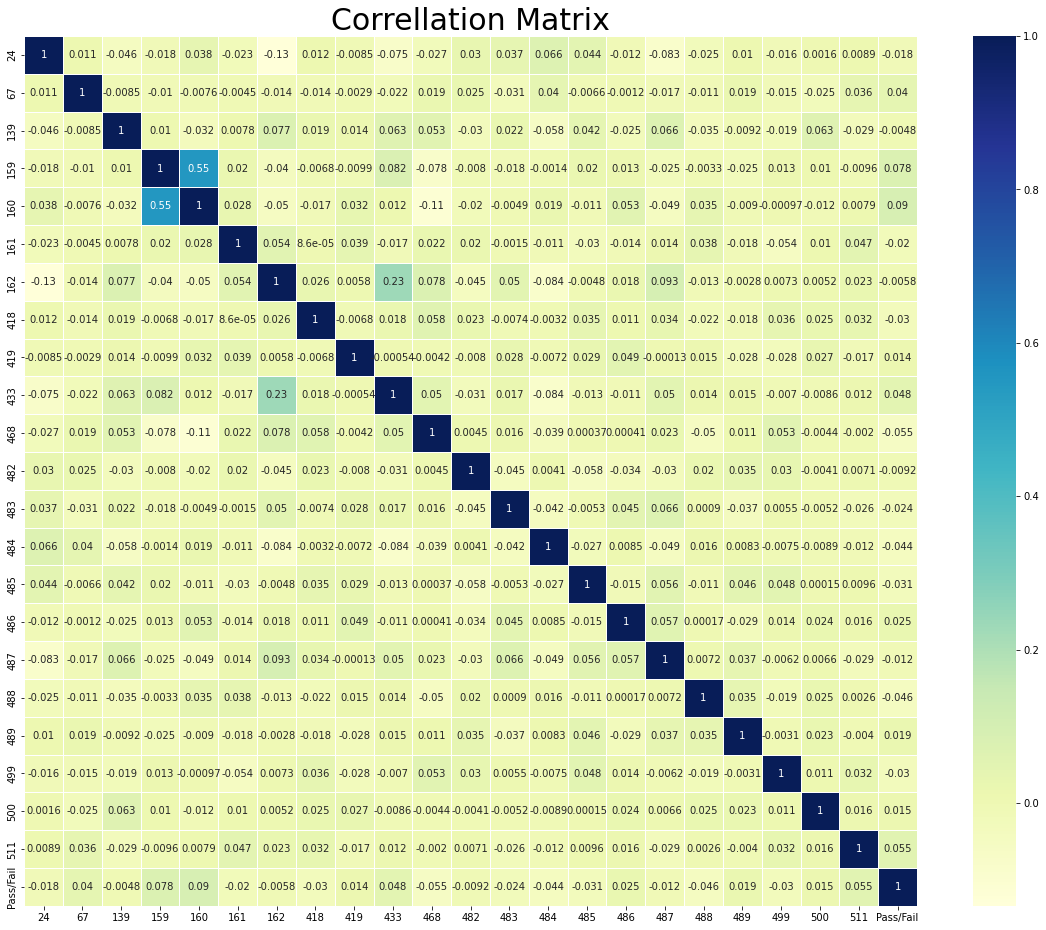

In [36]:
plt.subplots(figsize=(20, 16))
plt.title('Correllation Matrix', size=30)
sns.heatmap(df.corr(),annot=True,linewidths=0.5, cmap='YlGnBu');

In [37]:
df.shape

(1567, 23)

#### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

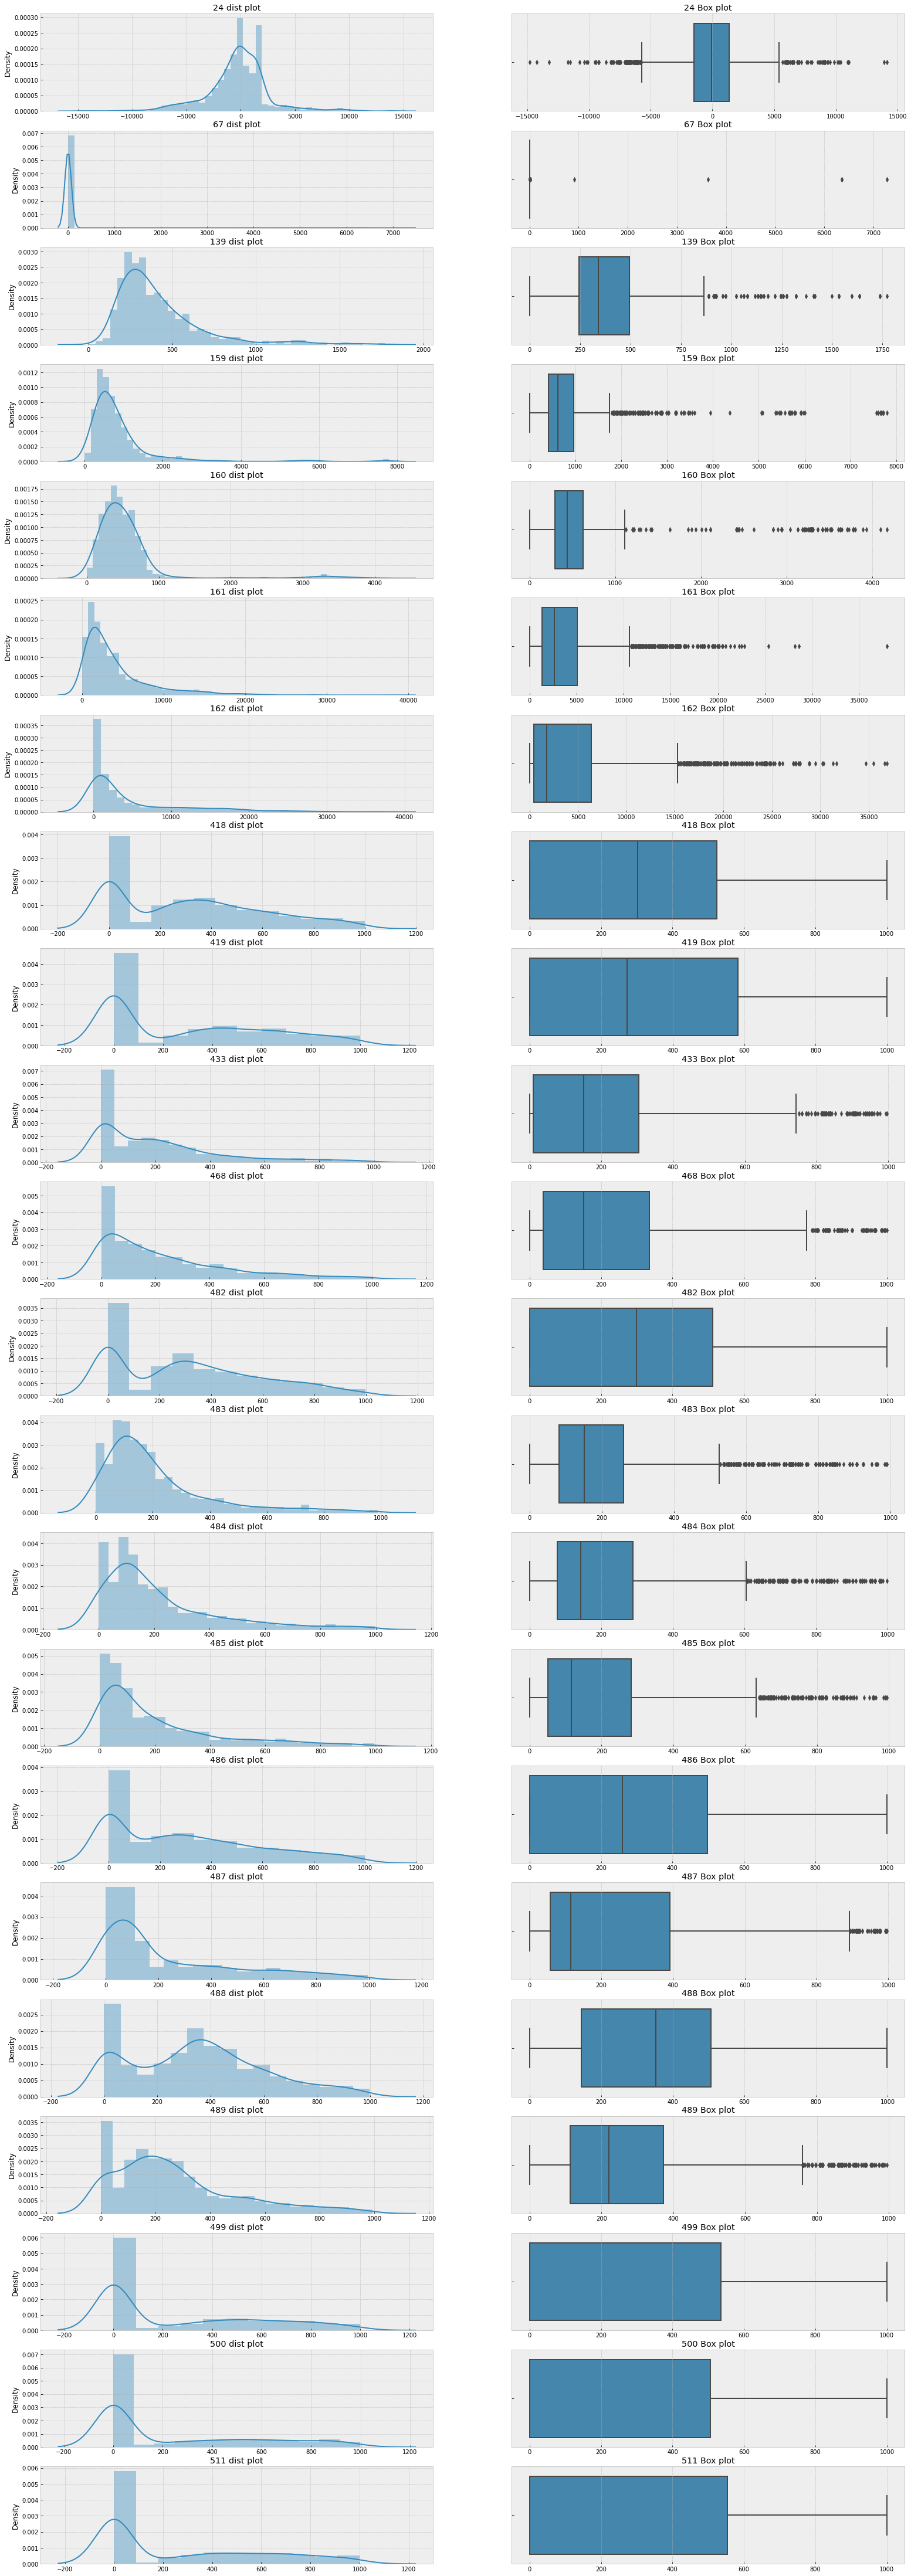

In [38]:
plt.style.use('bmh') #Apply plot style to all the plots
def compareDistBoxPlt(df, no_of_feature, figXmultiplier, figYMultiplier):
    N = len(no_of_feature)
    cols =2;
    rows = int(math.ceil(N/cols))
    rows =rows*2
    fig,axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figXmultiplier*rows,figYMultiplier*cols))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        ax.set_axis_off()
    count = 0
    for i, column in enumerate(no_of_feature):
        sns.distplot(df[column],ax=axs[count]);
        axs[count].set_title(column+ " dist plot")
        axs[count].set_xlabel("")
        axs[count].set_axis_on()
        count=count+1
        sns.boxplot(data=df, x=column,ax = axs[count]);
        axs[count].set_title(column+ " Box plot")
        axs[count].set_xlabel("")
        axs[count].set_axis_on()
        count=count+1
            
    plt.show()
compareDistBoxPlt(df, df.drop(TARGET,axis=1).columns, 1.2, 40);     

In [39]:
def replaceOutlierWithMedian(dataset, column):
    q1,q3 = np.quantile(dataset[column], [0.25,0.75])
    IQR = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1-(1.5*IQR)
    upper_whisker = q3 +(1.5*IQR)
    dataset[column]=np.where(dataset[column]>upper_whisker,dataset[column].median(),np.where(dataset[column]<lower_whisker,dataset[column].median(),dataset[column]))
    print('Outlier replaced from ', column , " feature")


### Replacing outliers with Median values

In [40]:
for feature in df.drop(TARGET,axis=1).columns:
    replaceOutlierWithMedian(df, feature)

Outlier replaced from  24  feature
Outlier replaced from  67  feature
Outlier replaced from  139  feature
Outlier replaced from  159  feature
Outlier replaced from  160  feature
Outlier replaced from  161  feature
Outlier replaced from  162  feature
Outlier replaced from  418  feature
Outlier replaced from  419  feature
Outlier replaced from  433  feature
Outlier replaced from  468  feature
Outlier replaced from  482  feature
Outlier replaced from  483  feature
Outlier replaced from  484  feature
Outlier replaced from  485  feature
Outlier replaced from  486  feature
Outlier replaced from  487  feature
Outlier replaced from  488  feature
Outlier replaced from  489  feature
Outlier replaced from  499  feature
Outlier replaced from  500  feature
Outlier replaced from  511  feature


### Plotting Box and dist plot again 

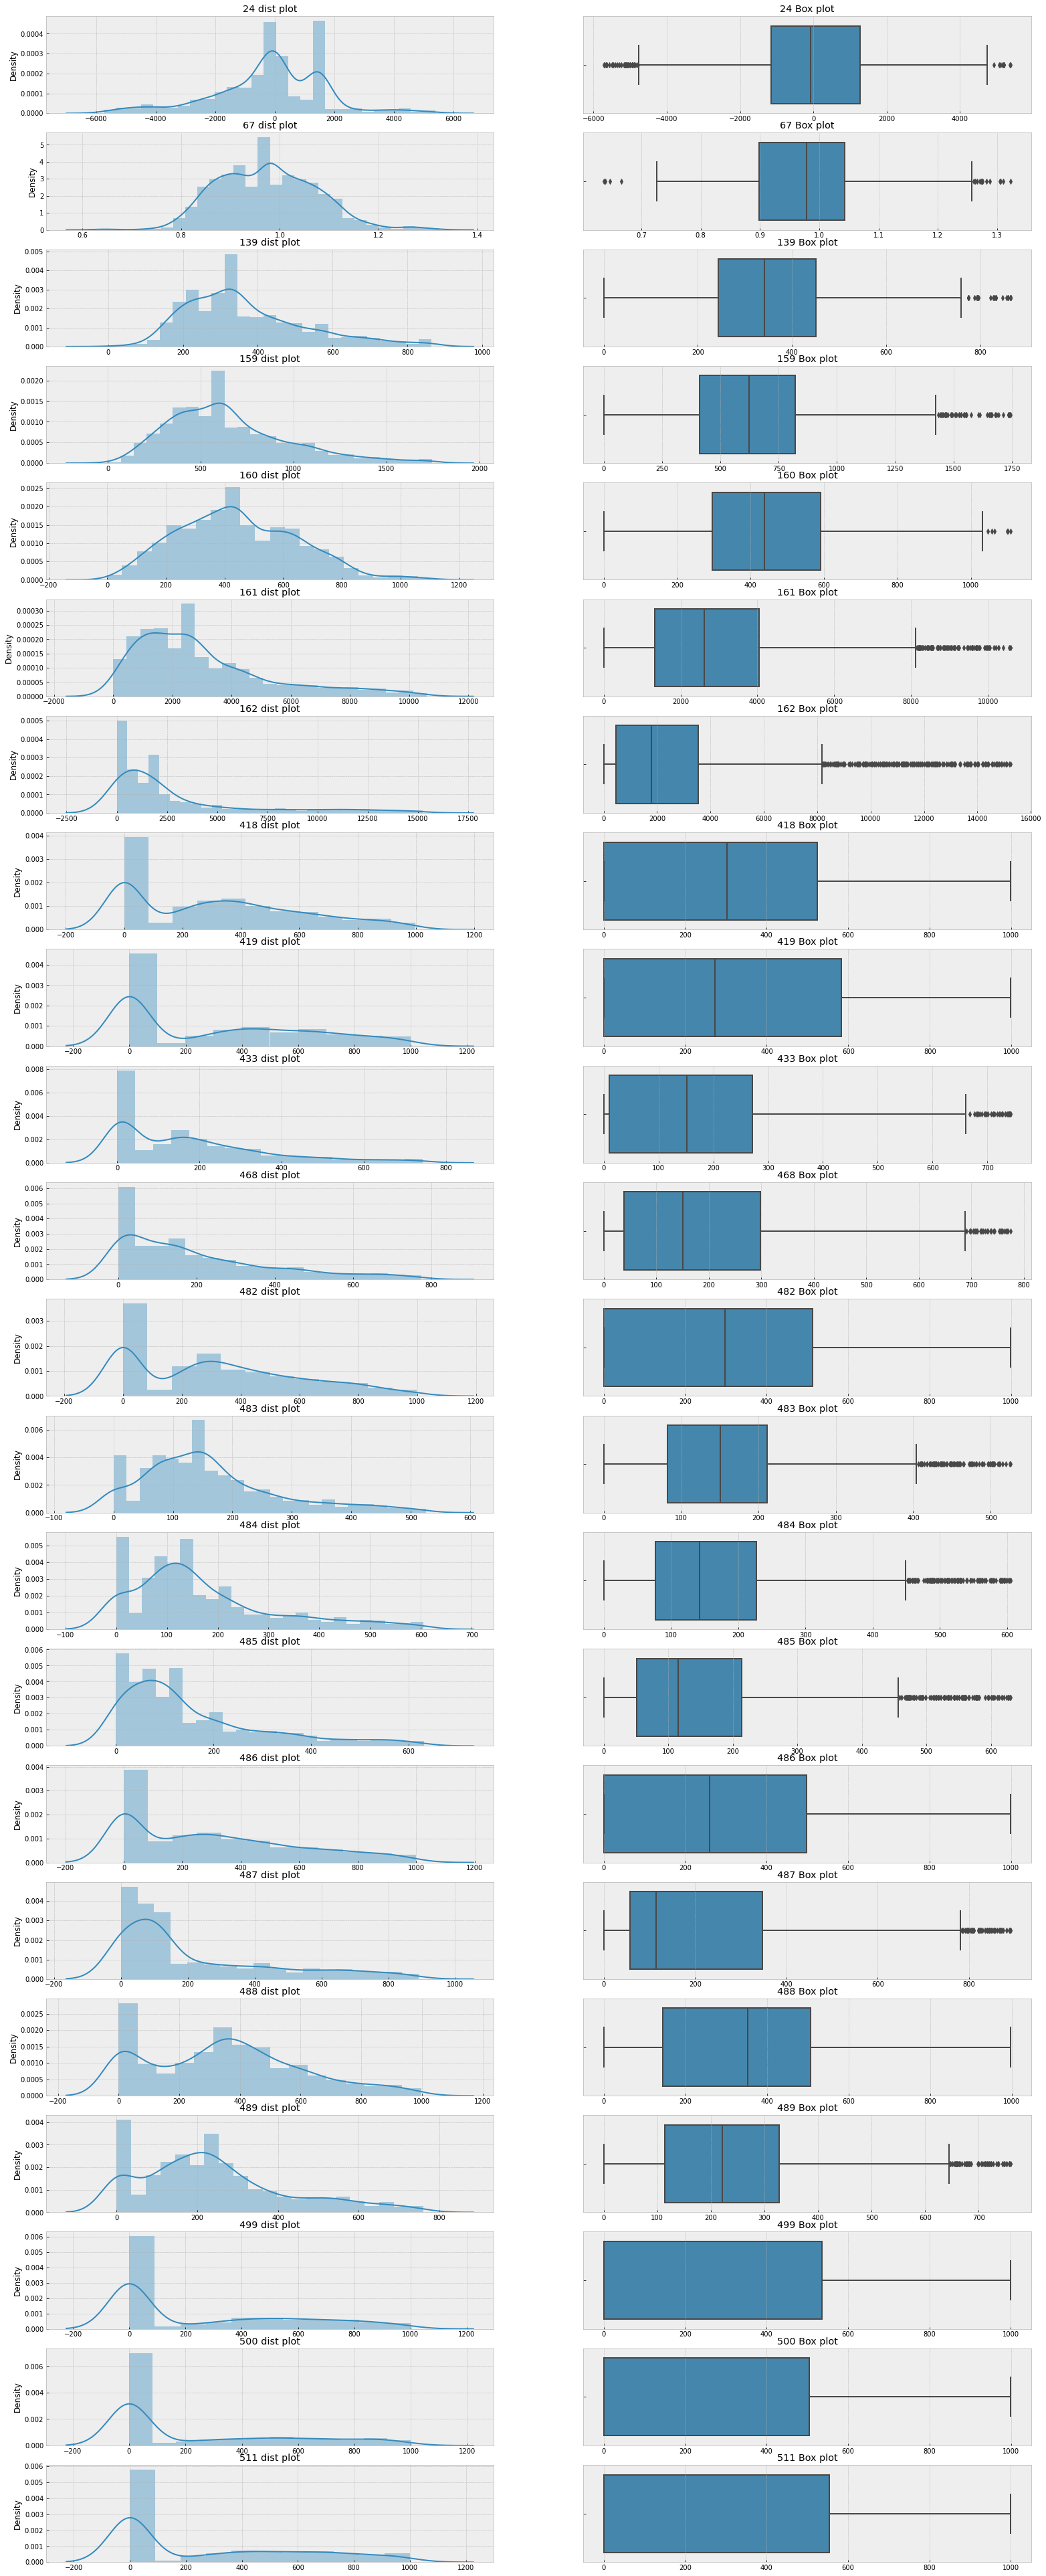

In [41]:
compareDistBoxPlt(df, df.drop(TARGET,axis=1).columns, 1.2, 35);   

#### When Outliers will replace with median Values , Distribution become sharper and Standard deviation become lesser. The End result is there might be some outliers which is the result of previous outliers handling. We can live with that small outliiers.
#### We cannot use capping. since the outliers are far away from the upper whisker

In [42]:
### Checking 0 value in all features and replace it median

In [43]:
(df == 0).astype(int).sum(axis=1)

0       6
1       7
2       5
3       4
4       6
       ..
1562    2
1563    0
1564    2
1565    1
1566    2
Length: 1567, dtype: int64

In [44]:
columns = df.drop([TARGET],axis=1).columns
for feature  in columns:
    df[feature] = df[feature].replace(0, df[feature].median())


In [45]:
(df == 0).astype(int).sum(axis=1)

0       3
1       3
2       2
3       2
4       2
       ..
1562    2
1563    0
1564    2
1565    0
1566    2
Length: 1567, dtype: int64

#### Observation:  There are number where median is 0. Thats why after replacing it with median value, there are 0 number remaing.

### 3. Data analysis & visualisation: [5 Marks]

### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

### Univariant Analyses of each Feature

In [46]:
df.drop(TARGET, axis=1)

24      67       139     159    160     161     162         418  \
0      751.00  0.9226  350.6710  1017.0  967.0  1066.0   368.0  525.096500   
1    -1640.25  1.1598  219.7679   568.0   59.0   297.0  3277.0  302.310800   
2    -1916.50  0.8694  306.0380   562.0  788.0   759.0  2100.0  302.310800   
3    -1657.25  0.9761  162.4320   859.0  355.0  3433.0  3004.0  317.736200   
4      117.00  0.9256  296.3030   699.0  283.0  1747.0  1443.0  302.310800   
...       ...     ...       ...     ...    ...     ...     ...         ...   
1562   356.00  0.9923  340.7360  1280.0  334.0  7112.0   565.0  708.665700   
1563   339.00  0.9786  355.0260   504.0   94.0   315.0   367.0  764.081600   
1564 -1226.00  0.9078  300.2620  1178.0  542.0  3662.0  1355.0  320.259235   
1565   394.75  0.9981  365.1101  1740.0  252.0  2702.0  1093.0  470.750600   
1566  -425.00  0.9683  627.6799   763.0  304.0   503.0  1797.0  320.259235   

             419       433  ...         483         484         485  \
0     272.891600   49.0013  ...  291.484200  494.699600  178.175900   
1     368.971300  199.7866  ...  246.776200  142.526200  359.044400   
2     272.891600  109.5747  ...  151.766500  142.526200  190.386900   
3     272.891600  181.2641  ...  100.488300  305.750000   88.555300   
4     866.029500  151.1687  ...  276.881000  461.861900  240.178100   
...          ...       ...  ...         ...         ...         ...   
1562  984.615400  158.7079  ...  206.564196  215.288948  201.111728   
1563  612.332400  108.2596  ...  206.564196  215.288948  201.111728   
1564  309.061299  110.5220  ...  206.564196  215.288948  201.111728   
1565  272.891600  276.8841  ...  206.564196  215.288948  201.111728   
1566  309.061299  422.8235  ...  206.564196  215.288948  201.111728   

             486         487         488         489       499       500  \
0     843.113800  114.596600   53.109800  221.507500    0.0000    0.0000   
1     130.635000  820.790000  194.437100  221.507500    0.0000    0.0000   
2     746.915000   74.074100  191.758200  250.174200    0.0000    0.0000   
3     104.666000   71.758300  352.511400  336.766000    0.0000  711.6418   
4     260.141800  587.377300  748.178100  221.507500  293.1396    0.0000   
...          ...         ...         ...         ...       ...       ...   
1562  302.506186  239.455326  352.616477  272.169707    0.0000    0.0000   
1563  302.506186  239.455326  352.616477  272.169707  816.3636  874.5098   
1564  302.506186  239.455326  352.616477  272.169707  456.7164    0.0000   
1565  302.506186  239.455326  352.616477  272.169707  511.3402  433.3952   
1566  302.506186  239.455326  352.616477  272.169707    0.0000    0.0000   

           511  
0       0.0000  
1       0.0000  
2     244.2748  
3       0.0000  
4       0.0000  
...        ...  
1562  235.7895  
1563  700.0000  
1564    0.0000  
1565  456.4103  
1566  317.6471  

[1567 rows x 22 columns]

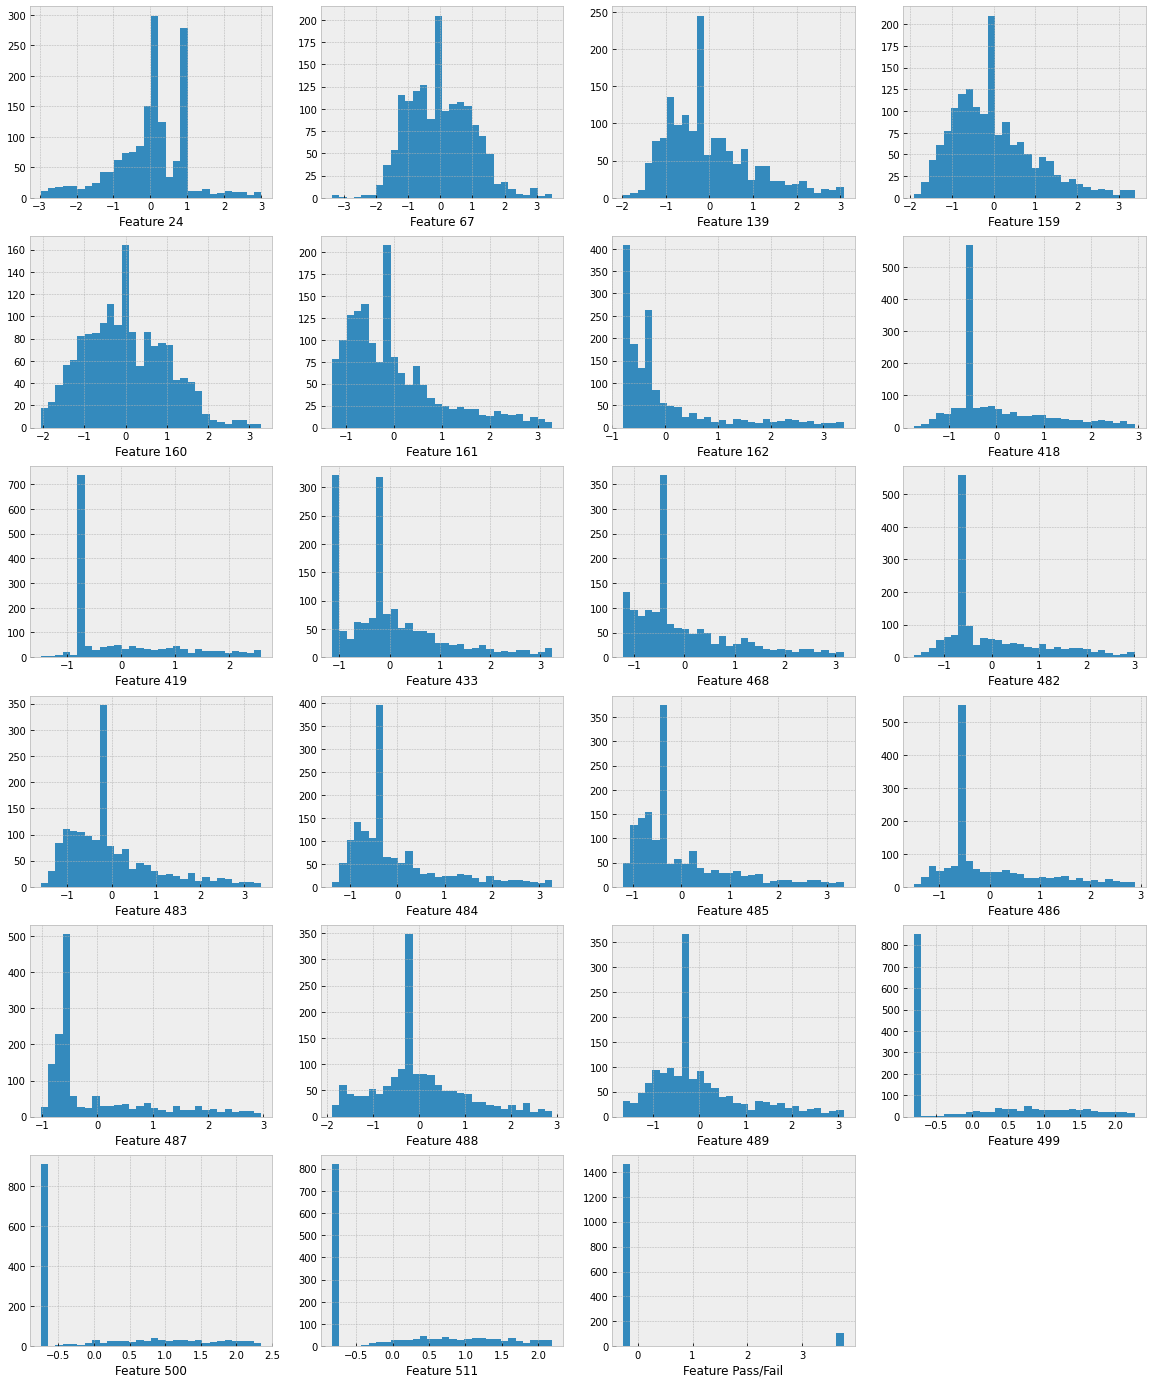

In [47]:
plt.style.use('bmh') #Apply plot style to all the plots
plt.figure(figsize=(20, 50))
col = 1
sc = StandardScaler()
df_temp = df.copy(deep=True);
df_temp = sc.fit_transform(df)
df_temp = pd.DataFrame(df_temp, columns= df.columns)
for i in df.columns:
    plt.subplot(12, 4, col)
    df_temp[i].hist(bins = 30,figsize=(20,50))
    plt.xlabel("Feature " +i)
    col += 1 
plt.show()


#### Most of the features are skewed. 
#### Some of the features are still having 0.

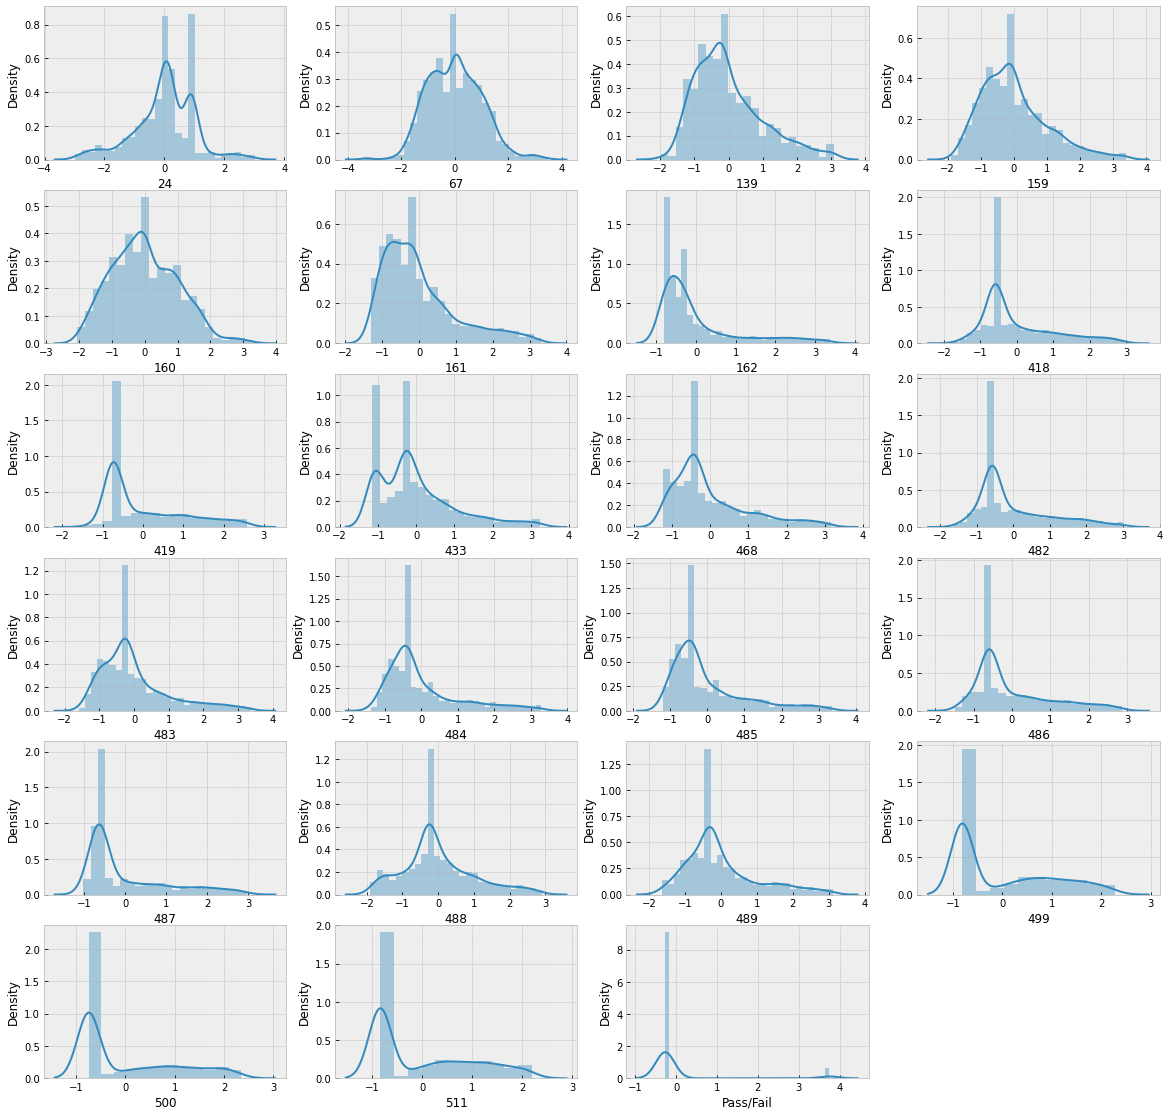

In [48]:
#plot density
plt.style.use('bmh') #Apply plot style to all the plots
plt.figure(figsize=(20, 40))
col = 1
for i in df_temp.columns:
    plt.subplot(12, 4, col)
    sns.distplot(df_temp[i],kde=True)
    col += 1 
plt.show()

#### I can see  most of the features are leftly and rightly skewed
#### Most of the features seems to have normal distribution
#### Becuase of outlier imputation, the peak of feature is high.

### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

### Countplot 

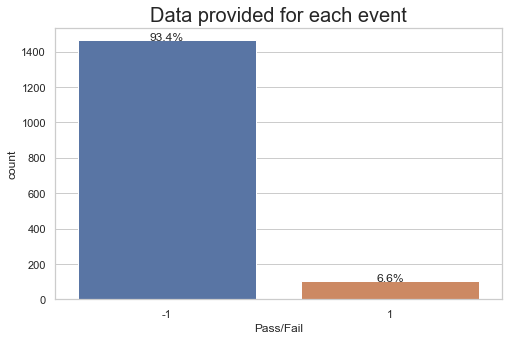

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(df[TARGET])
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() +0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### Data Set is highly imbalanced.

<AxesSubplot:>

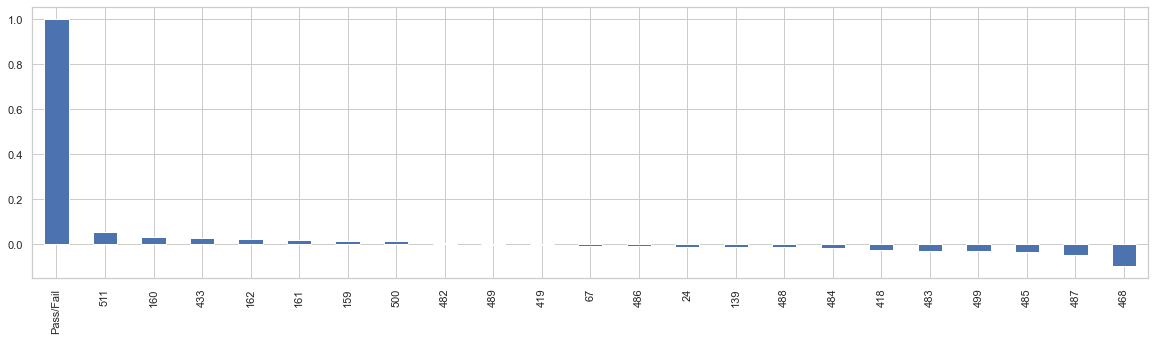

In [50]:
plt.figure(figsize=(16,10))
df.corr()[TARGET].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

#### Some of the features are having very low correlation with target features. These features are 469,139,419,162,466

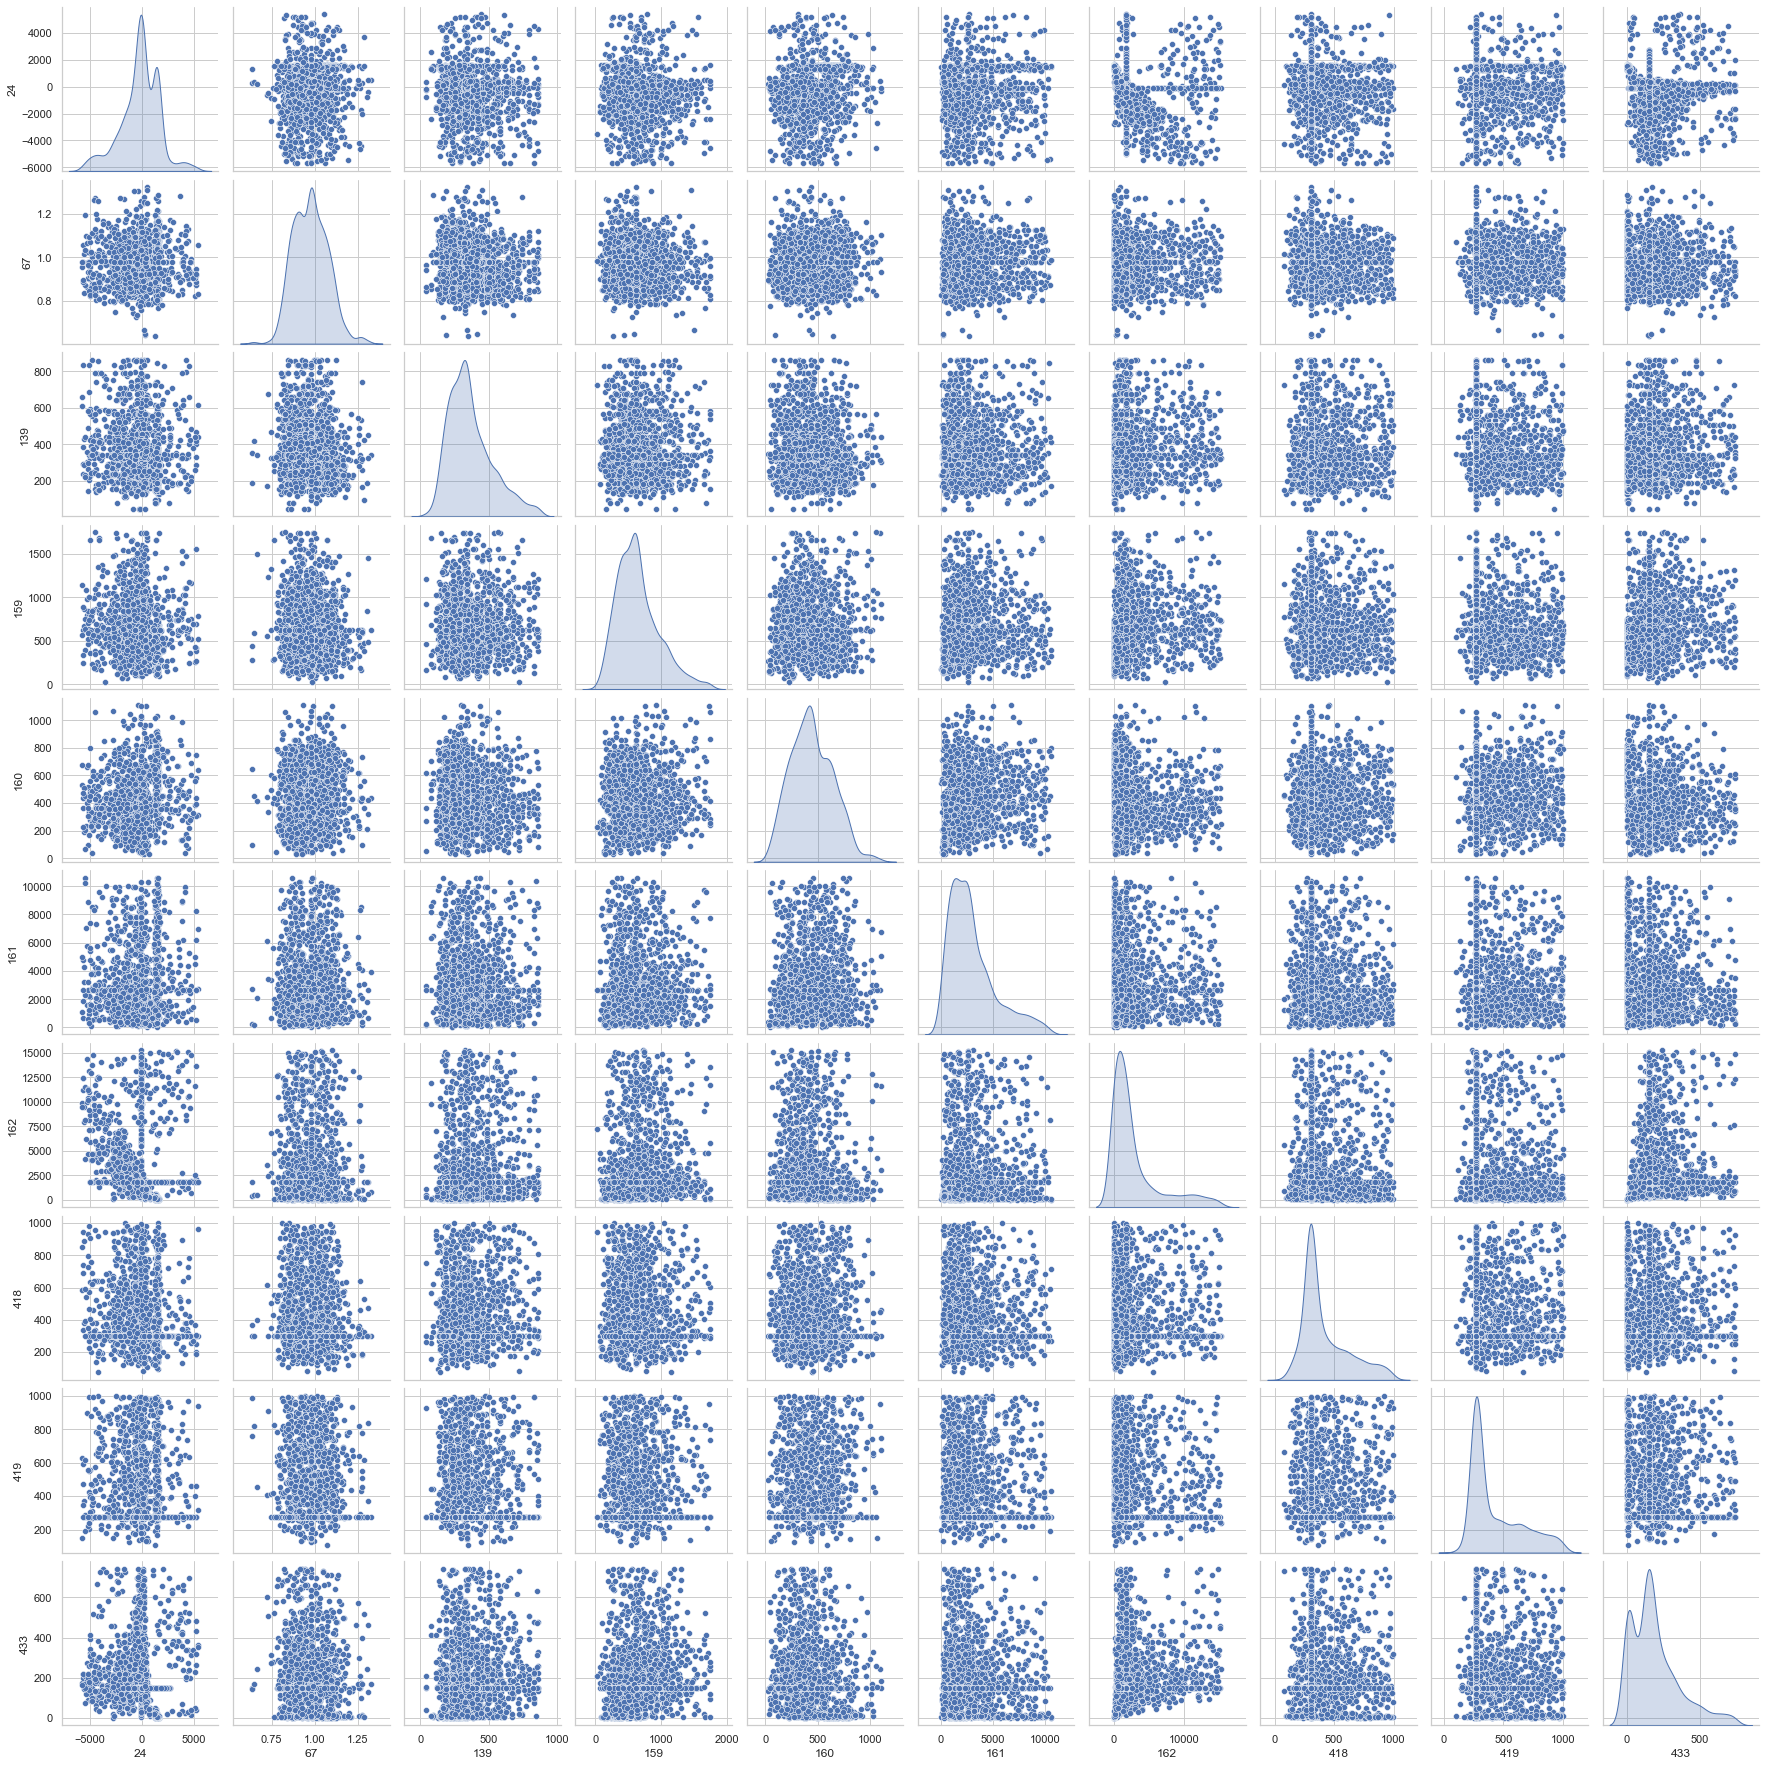

In [51]:
sns.pairplot(df.iloc[:,0:10],diag_kind = 'kde');

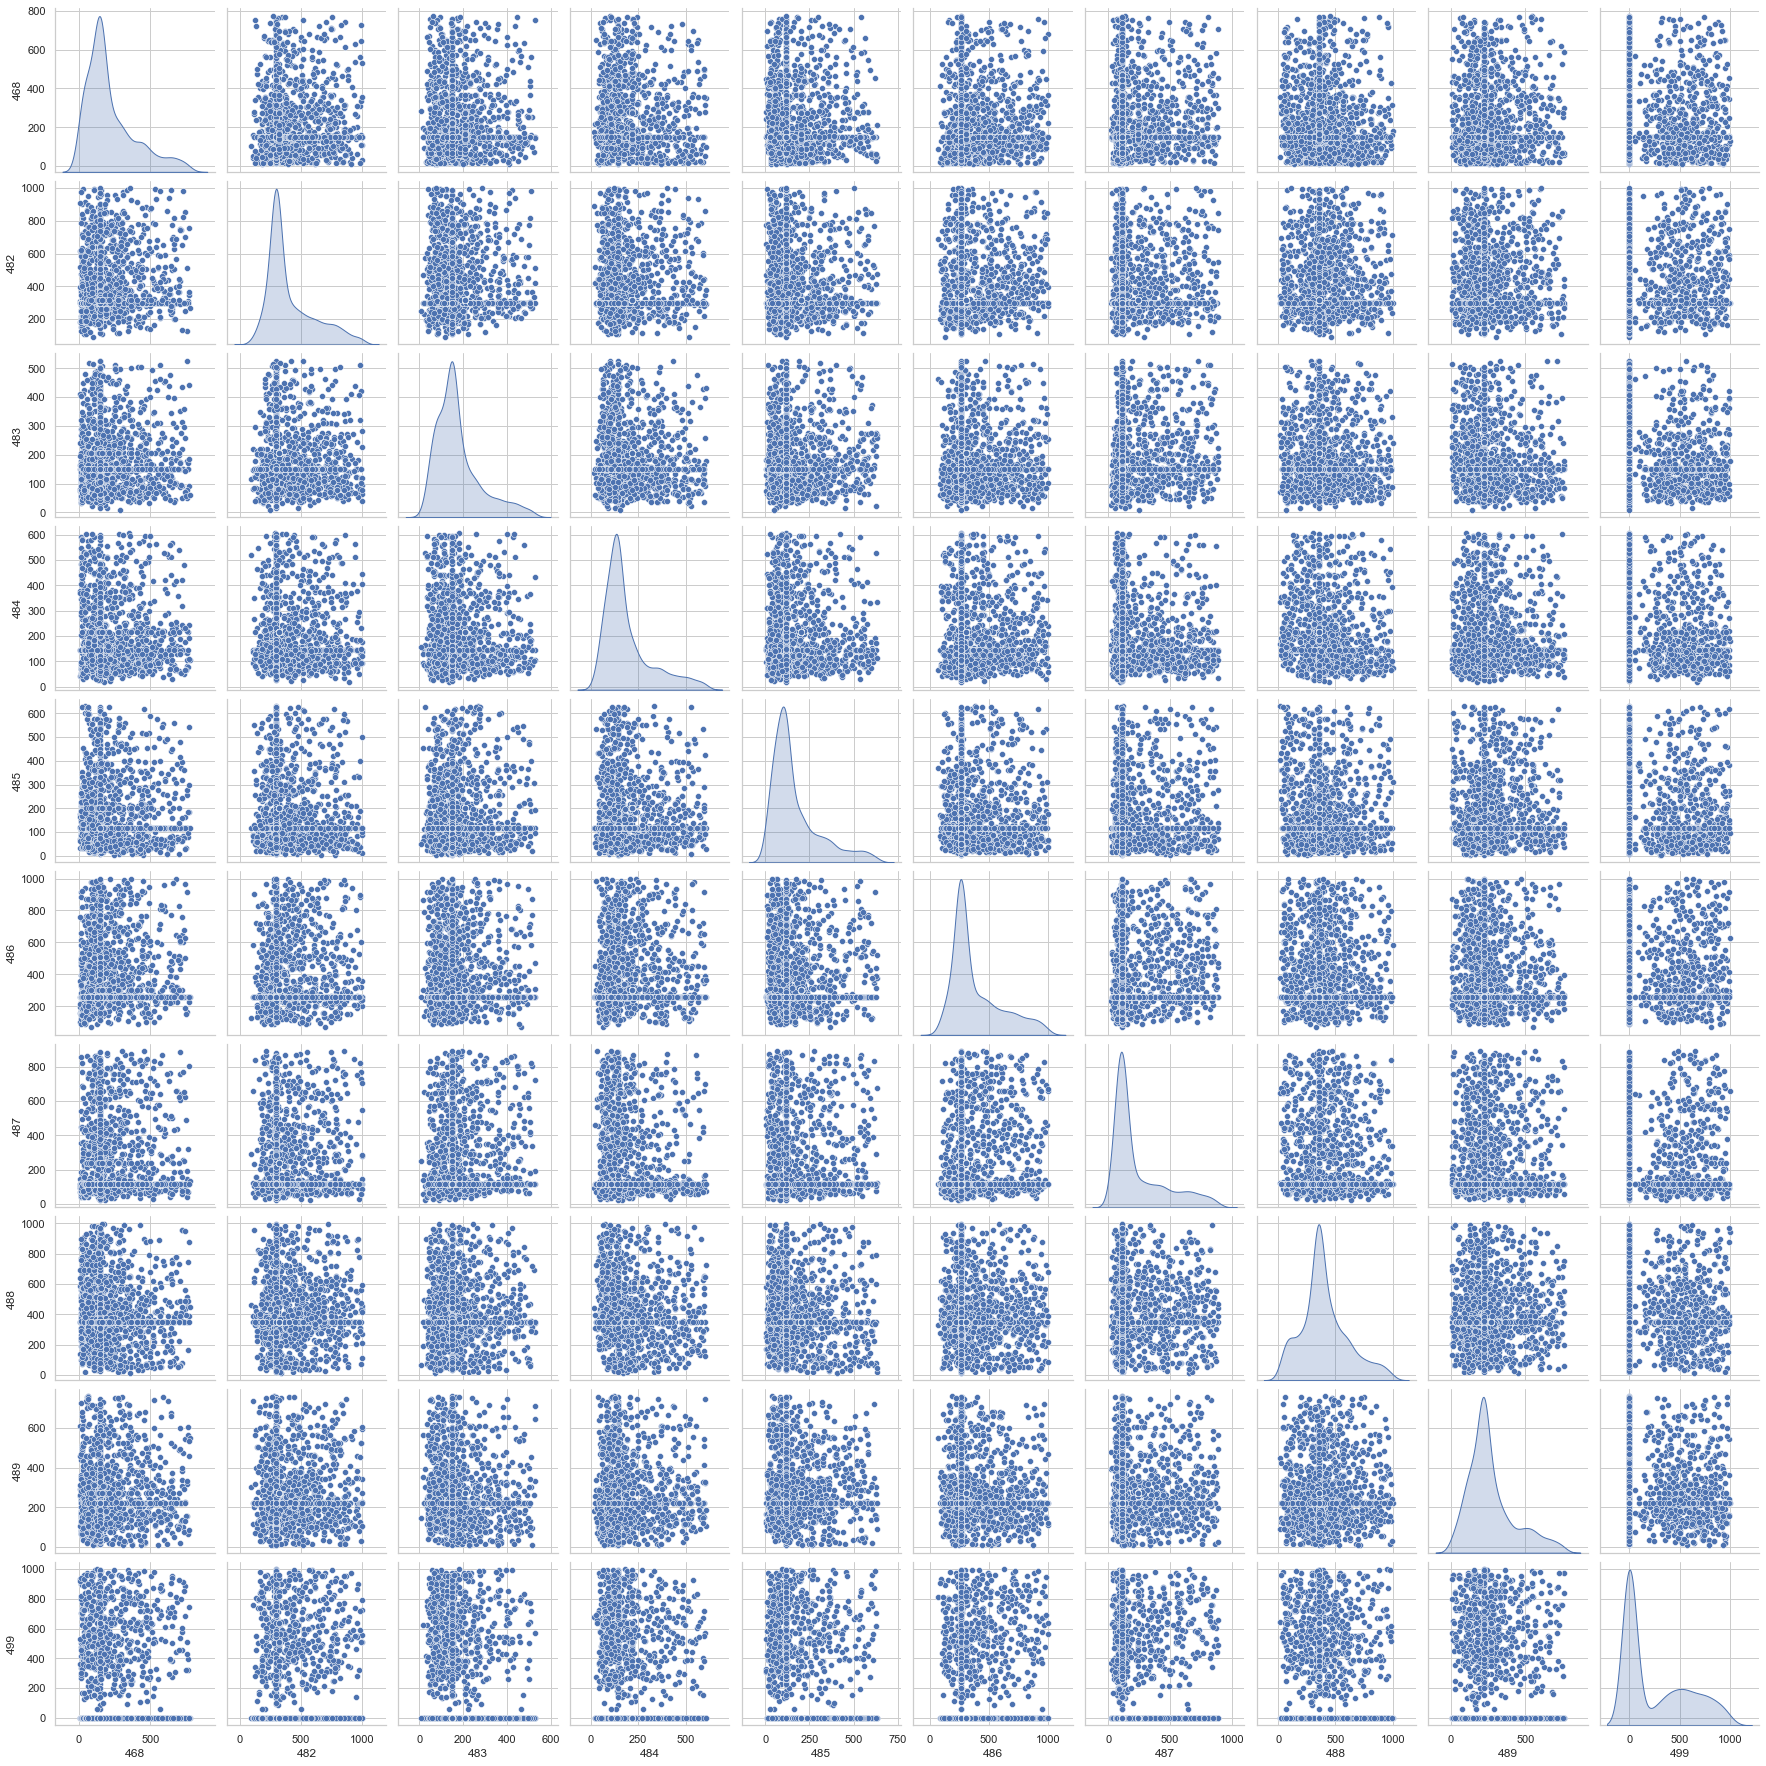

In [52]:
sns.pairplot(df.iloc[:,10:20],diag_kind = 'kde');

### Observation : Features are independent to each other. Scattered points represent there is no relationship

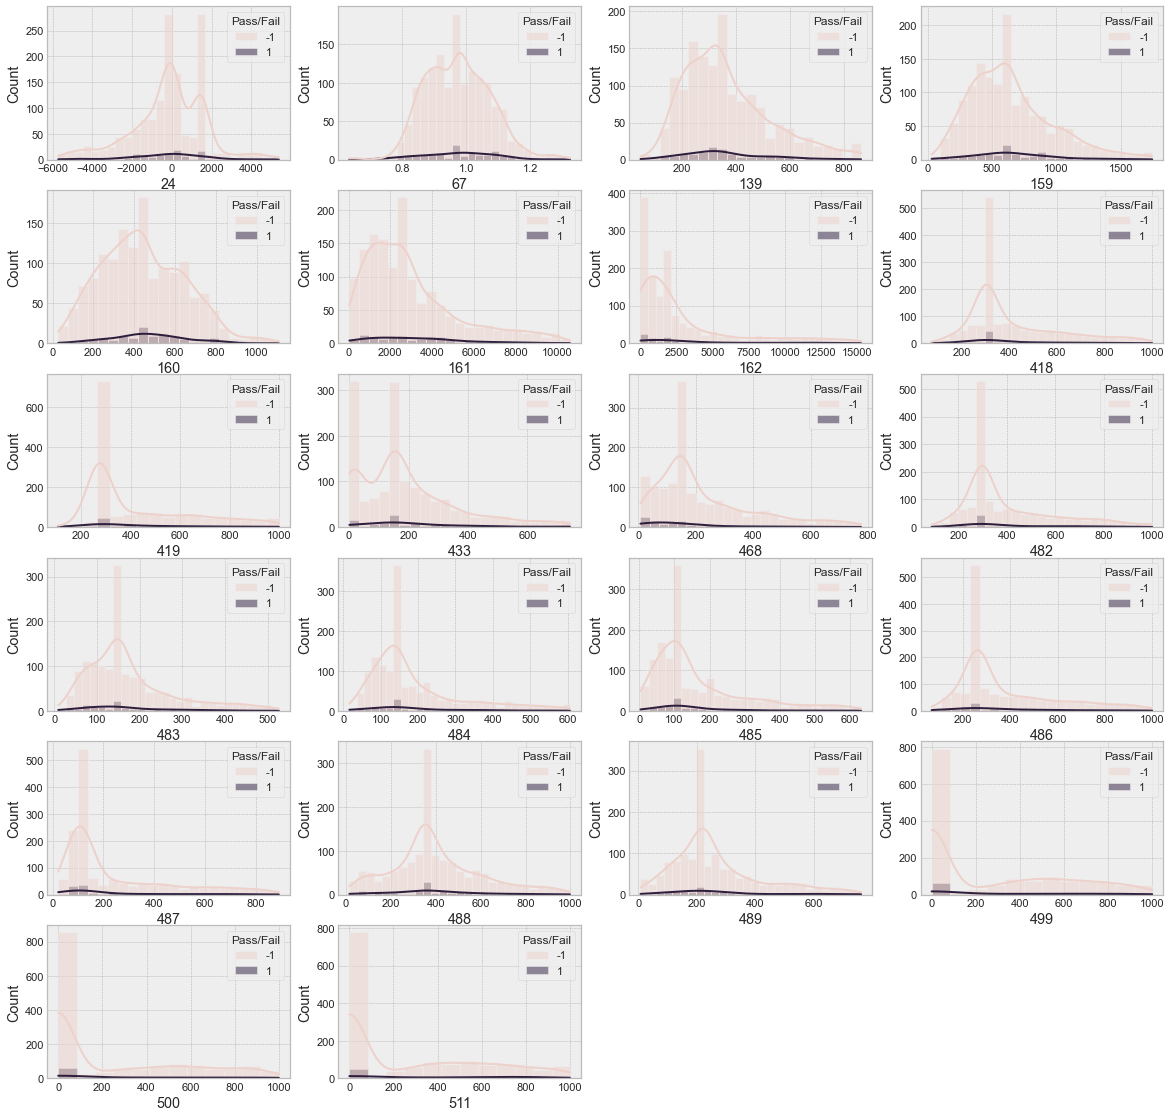

In [53]:
# Lets take Pass/Fail as the Target variable
plt.figure(figsize = (20,40))
plt.style.use('bmh') #Apply plot style to all the plots
col = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(12, 4, col)
    sns.histplot(data=df,x=i,fill=True, kde=True, hue=TARGET)
    col = col+1

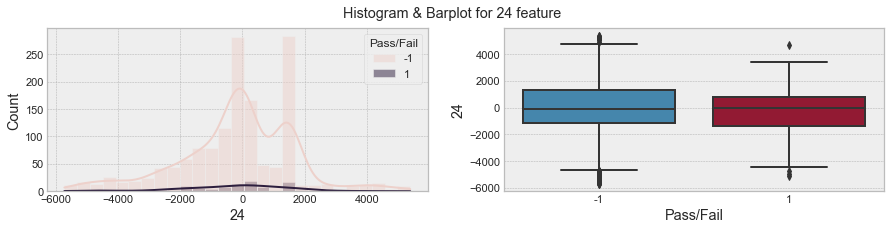

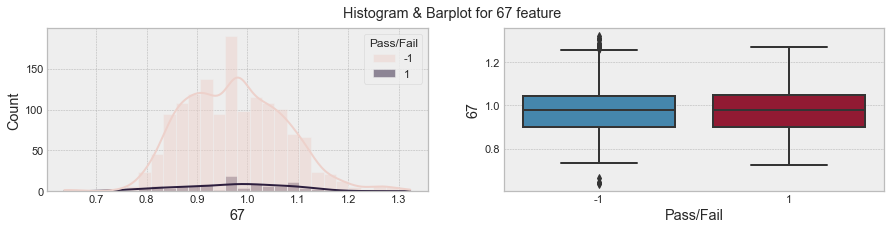

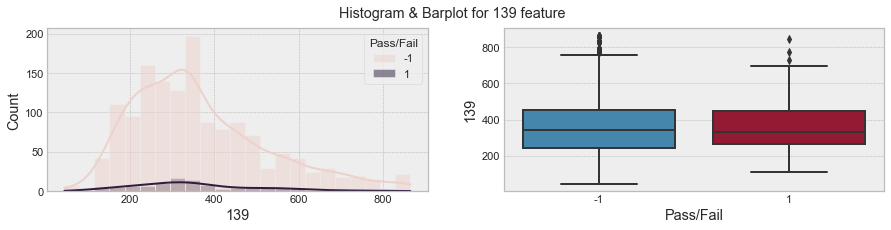

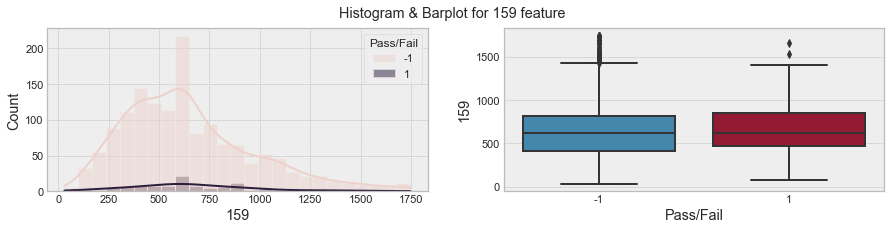

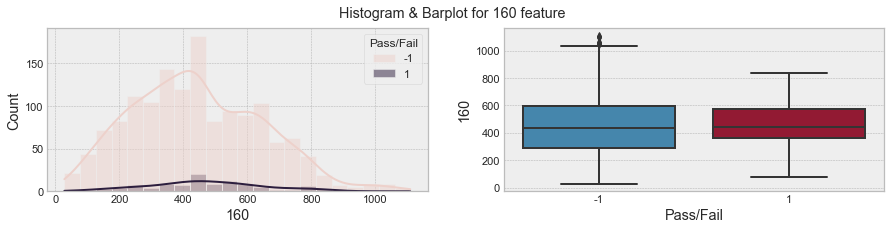

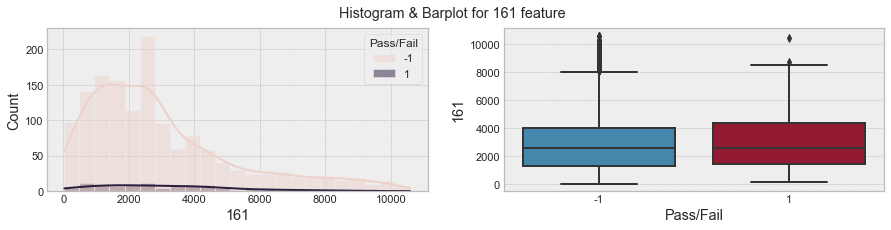

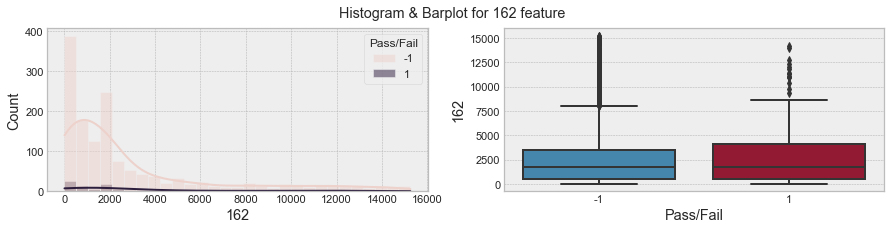

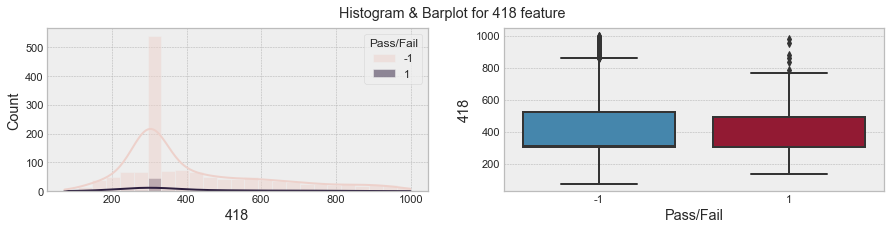

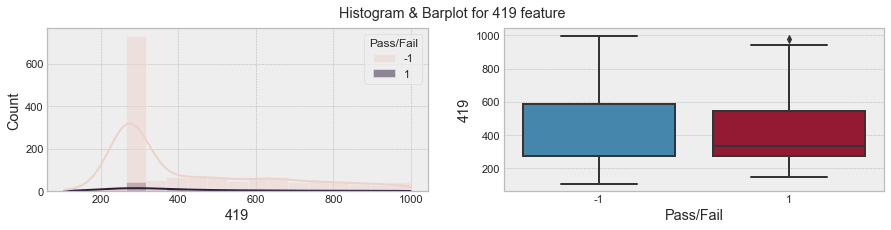

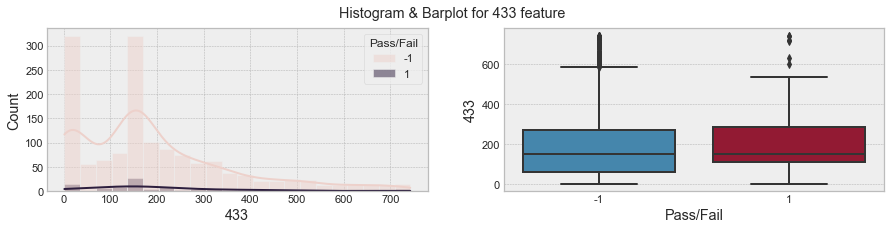

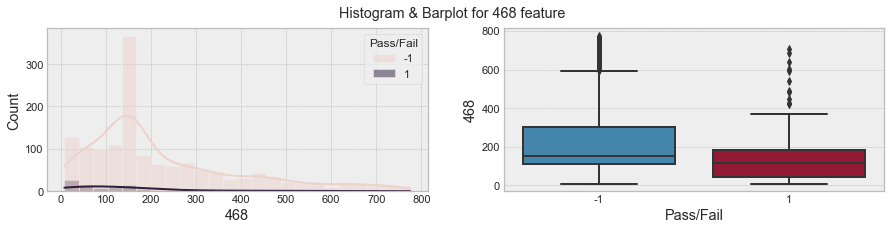

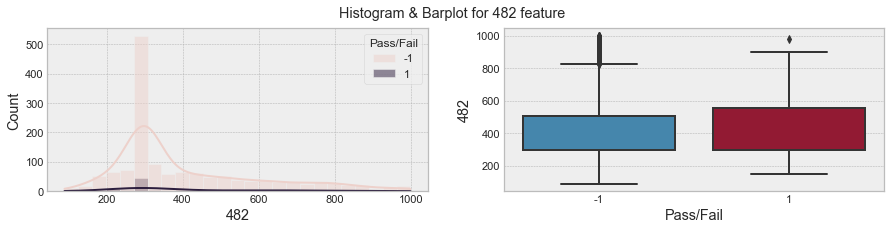

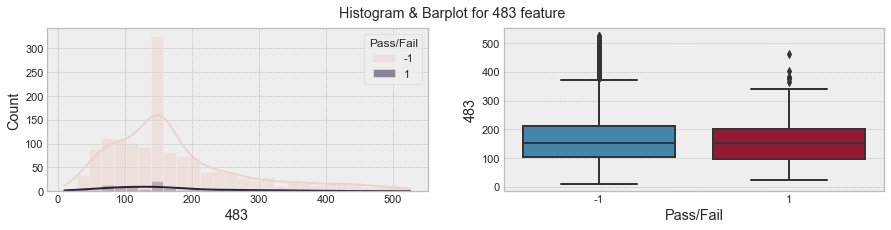

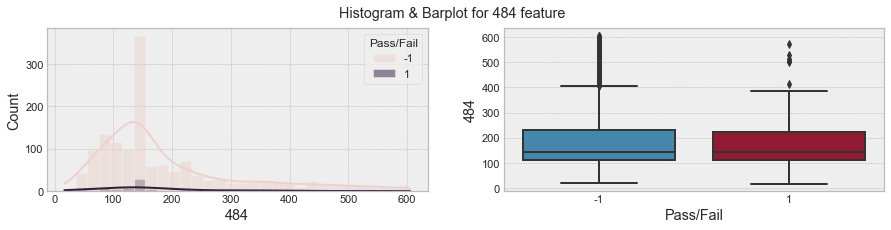

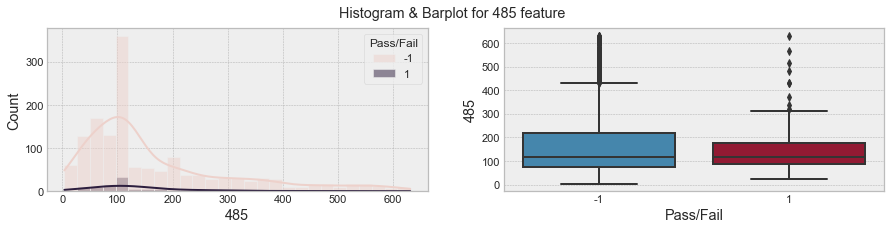

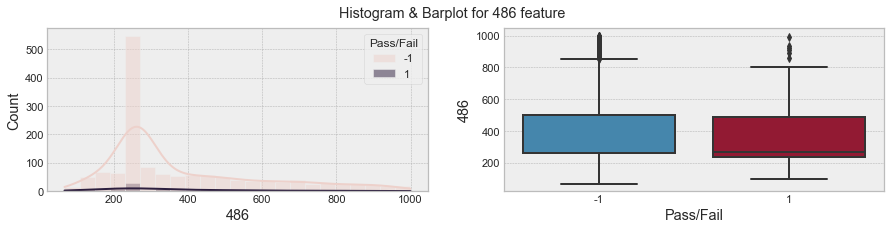

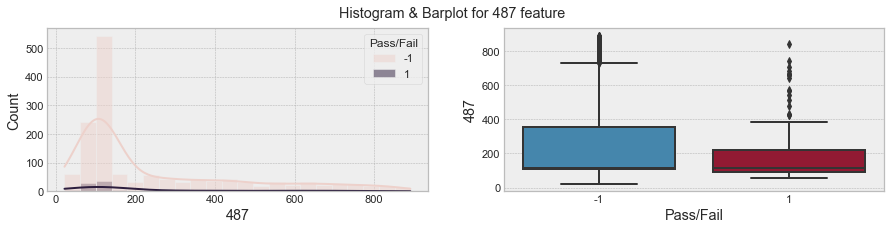

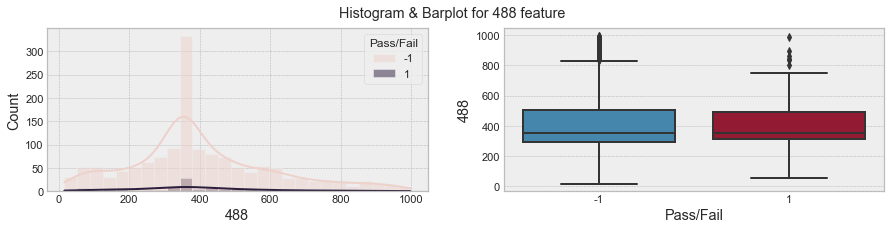

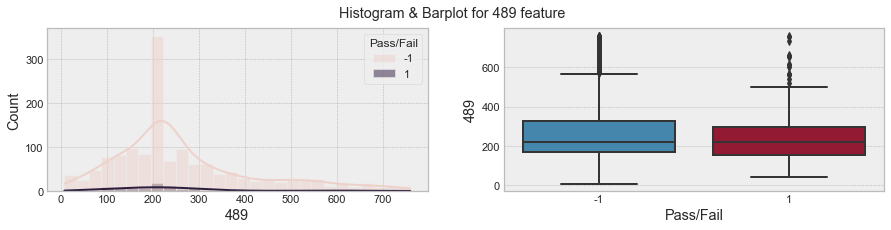

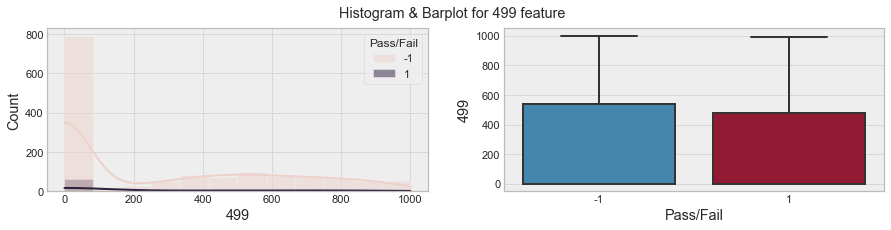

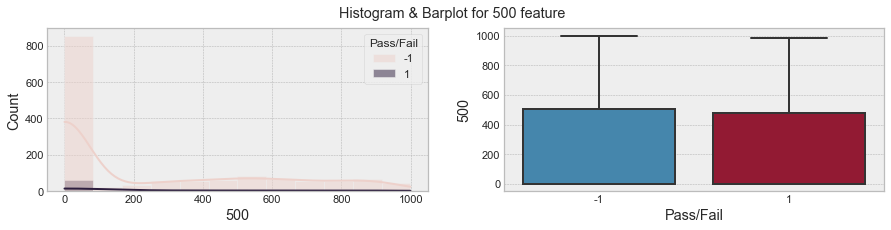

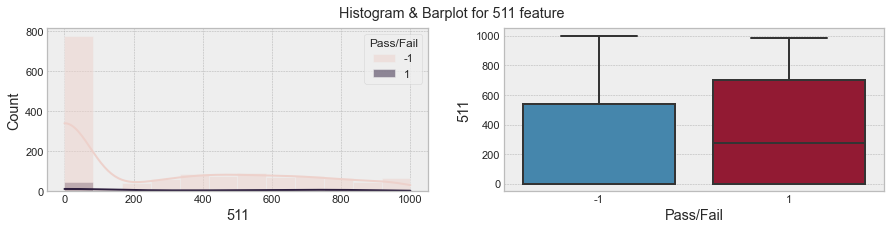

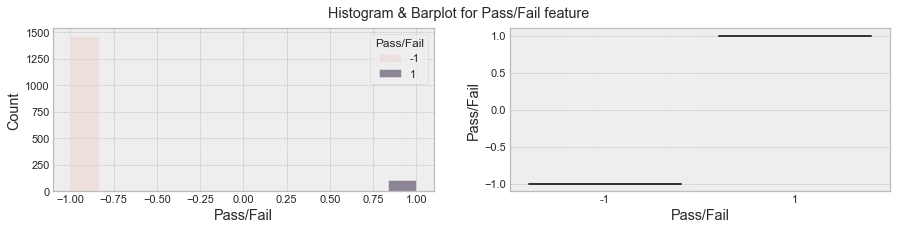

In [54]:
# Lets take LoanOnCard as the Target variable
num_cols = df.columns
for i in num_cols:
    fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    plt.suptitle("Histogram & Barplot for {} feature".format(i), ha='center' )
    sns.histplot(data=df,x=i,ax=ax[0],fill=True, kde=True, hue='Pass/Fail')
    sns.boxplot(data=df,x='Pass/Fail',ax=ax[1], y=i)

### Data Represent outliers in the box plot.
### data is skewed in both direction
### Data set is imbalanced as category 1 has very low histogram.

In [55]:
del sc, df_temp, 

### 4. Data pre-processing: [10 Marks]

### A. Segregate predictors vs target attributes.

In [56]:
X = df.drop([TARGET],axis=1)
y = df[[TARGET]]

#### XGBoostClassifier is not accepting Target as -1. In order to use XGBoostClassfier, we must need to replace -1 with 0

In [57]:
y.replace(-1, 0,inplace=True)

In [58]:
y.value_counts()

Pass/Fail
0            1463
1             104
dtype: int64

In [59]:
y.value_counts()

Pass/Fail
0            1463
1             104
dtype: int64

### B. Check for target balancing and fix it if found imbalanced. [3 Marks]

In [60]:
y.value_counts()

Pass/Fail
0            1463
1             104
dtype: int64

In [61]:
y.value_counts(normalize=True)

Pass/Fail
0            0.933631
1            0.066369
dtype: float64

<AxesSubplot:xlabel='Pass/Fail'>

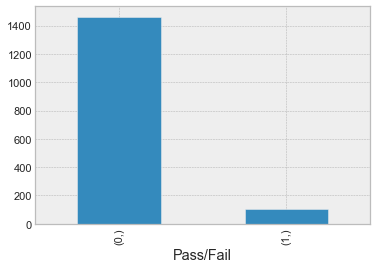

In [62]:
y.value_counts().plot(kind= 'bar')

### Observation: Depenedent variable is highly imbalanced

In [63]:
### Let Use SMOTE To balance the minority class

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1,stratify=y)
#X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train, test_size=0.20, random_state=1,stratify=y_train)

In [65]:
X_train_resampled, y_train_resampled = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [66]:
### Let Use ADASYN To balance the minority class

In [67]:
#X_train_resampled, y_train_resampled = ADASYN(random_state=1).fit_sample(X, y)

In [68]:
print("-1 Count : ",len(y_train_resampled[y_train_resampled==-1]))
print("1 Count : ", len(y_train_resampled[y_train_resampled==1]))

-1 Count :  2046
1 Count :  2046


<AxesSubplot:xlabel='Pass/Fail'>

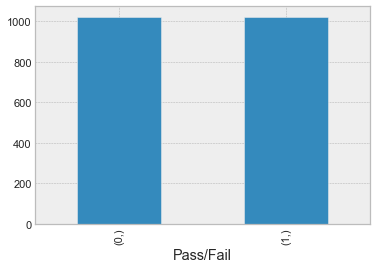

In [69]:
y_train_resampled.value_counts().plot(kind= 'bar')

#### Observation : Dependent variable is balanced now.

### C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

#### Note Train validation and test split is done in the above step. Scalling is performed in this step. SMOTE can only be applied in training set not on testing set. That's why train test split was done in the previous step

In [70]:
y_train_resampled.value_counts()

Pass/Fail
0            1023
1            1023
dtype: int64

In [71]:
scaler = StandardScaler()

In [72]:
X_train_scale = scaler.fit_transform(X_train_resampled)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
#X_validate_scale = scaler.fit_transform(X_validate)
X_test_scale = scaler.transform(X_test)
X_test_scale =pd.DataFrame(X_test_scale, columns=X_test.columns)

### D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [73]:
X_train_org = scaler.fit_transform(X_train)
X_train_org = pd.DataFrame(X_train_org, columns=X_train.columns)
X_train_org.describe().apply(lambda s: s.apply('{0:.5f}'.format))
X_test_org = scaler.transform(X_test)
X_test_org = pd.DataFrame(X_test_org, columns=X_train.columns)

In [74]:
pd.merge(X_train_scale.describe().T['std'], X_train_org.describe().T['std'], left_index=True,right_index=True,suffixes= ('_X_train_Balance_scale', '_X_train_original'),).T


24        67       139       159       160  \
std_X_train_Balance_scale  1.000244  1.000244  1.000244  1.000244  1.000244   
std_X_train_original       1.000457  1.000457  1.000457  1.000457  1.000457   

                                161       162       418       419       433  \
std_X_train_Balance_scale  1.000244  1.000244  1.000244  1.000244  1.000244   
std_X_train_original       1.000457  1.000457  1.000457  1.000457  1.000457   

                           ...       483       484       485       486  \
std_X_train_Balance_scale  ...  1.000244  1.000244  1.000244  1.000244   
std_X_train_original       ...  1.000457  1.000457  1.000457  1.000457   

                                487       488       489       499       500  \
std_X_train_Balance_scale  1.000244  1.000244  1.000244  1.000244  1.000244   
std_X_train_original       1.000457  1.000457  1.000457  1.000457  1.000457   

                                511  
std_X_train_Balance_scale  1.000244  
std_X_train_original       1.000457  

[2 rows x 22 columns]

#### Standard deviation is almost same. There are new rows added to the balance X_train dataset. Thats why there is change in small variation 

In [75]:
pd.merge(X_test_scale.describe().T['std'], X_test_org.describe().T['std'], left_index=True,right_index=True,suffixes= ('_of_smote_applied_testset', '_without_smote_testset'),).T


24        67       139       159  \
std_of_smote_applied_testset  1.104715  1.066211  1.117043  1.046618   
std_without_smote_testset     1.008778  0.978322  0.984396  0.980928   

                                   160       161       162       418  \
std_of_smote_applied_testset  1.148270  1.140637  0.880507  1.104936   
std_without_smote_testset     0.995672  1.024746  0.854235  1.007362   

                                   419       433  ...       483       484  \
std_of_smote_applied_testset  1.102798  1.181979  ...  1.072739  1.114801   
std_without_smote_testset     1.006772  1.087458  ...  0.946920  1.051286   

                                   485       486       487       488  \
std_of_smote_applied_testset  1.267444  1.118429  1.086941  1.031817   
std_without_smote_testset     1.120115  1.000752  0.976552  0.995247   

                                   489       499       500       511  
std_of_smote_applied_testset  1.085877  1.027927  1.026355  1.068645  
std_without_smote_testset     0.976372  0.951834  0.999086  1.011988  

[2 rows x 22 columns]

#### std_without_smote_testset mean direct scaling is applied 
#### std_of_smote_applied_testset means smote is applied on training dataset and same mean, std is used to scale testing dataset.

### If you see standard deviation is almost same. Ofcourse there is a small deviation in standard deviation because of smote applied on training dataset 


#### Standard deviation are very similar for every features.Almost decimal places are changed. 
#### If both smote applied training and original training dataset are compared, there is small variance because of extra amount of synthetic data added.
#### standard deviation is depend on training dataset. mean and standard deviation of smote applied test data is somewhat different from original test dataset. but noo much.. There would be only decimal places changes if compared.

In [76]:
del X_train_org, X_test_org

### 5. Model training, testing and tuning: [20 Marks]

In [77]:
cv_value=5
def fit_n_print(model, X_train_p, X_test_p, y_train_p, y_test_p):  # take the model, train data and test data as input
    '''
    This method accept the model and train, test data.
    This method do  the accuracy, AUC, Cross Validation and return the response. This method perform 3 Cross validation.
    Param 1: It accept the model
    Param 2: X_train is the training data
    Param 3: X_test_p is the testing data
    Param 4: y_train_p is the y variable of training data
    Param 5: y_test_p is the y variable of training data
    '''
    start = time.time()  # note the start time 
    if isinstance(model, XGBClassifier) :
        model.fit(X_train_p, y_train_p, early_stopping_rounds=5, eval_set=[(X_test_p, y_test_p)], eval_metric='auc')   # fit the model using the train data
    else:
        model.fit(X_train_p, y_train_p);

    pred = model.predict(X_test_p)     # model predictions on the test data
    accuracy_train = metrics.accuracy_score(y_train_p, model.predict(X_train_p))# calculate the accuracy on the train data
    #print(y_test_p)
    accuracy_test = metrics.accuracy_score(y_test_p , model.predict(X_test_p))  # calculate the accuracy on the test data
    precision = metrics.precision_score(y_test_p, pred)
    recall = metrics.recall_score(y_test_p, pred)
    auc = metrics.roc_auc_score(y_test_p, pred)
    f1 = metrics.f1_score(y_test_p, pred)
    labels = [1,0]
    plot_confusion_matrix(model, X_test_p, y_test_p, labels=labels)
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    return accuracy_train, accuracy_test,auc, precision, recall, f1, duration,pred, model

def printResult(result):
    '''
    This method will print score in the form of table. It accept the dictionary object which has all the scores
    Param: result
    return Dataframe coming out from result
    '''
    result1 = pd.DataFrame(np.array(list(result.values()))[:,:-2],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Training accuracy','Tesing_accuracy', 'auc','precision', 'recall', 'f1', 'Elapsed'],
                      index= result.keys())   # use the model names as index

    result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

    return result1

### A. Use any Supervised Learning technique to train a model. [2 Marks]

Training accuracy Tesing_accuracy       auc precision  \
Model                                                                  
Base SVC Model          0.986804        0.900212  0.526796  0.136364   

                  recall        f1   Elapsed  
Model                                         
Base SVC Model  0.096774  0.113208  0.199867

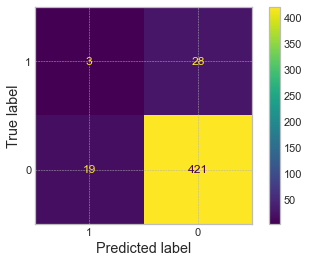

In [78]:
result={}
model = SVC(random_state=1)
#y_train_resampled = y_train_resampled.replace({-1:0})
result['Base SVC Model'] =fit_n_print(model, X_train_scale, X_test_scale, y_train_resampled, y_test)
printResult(result)

In [79]:
print(classification_report(y_test,result['Base SVC Model'][7]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       440
           1       0.14      0.10      0.11        31

    accuracy                           0.90       471
   macro avg       0.54      0.53      0.53       471
weighted avg       0.88      0.90      0.89       471



### B. Use cross validation techniques. [3 Marks]

In [80]:
cv ={}
def cross_Validation(pipeline,X_train_p, y_train_p, fold):
    
    if isinstance(fold, LeaveOneOut):
        scorer = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
                  'precision' : metrics.make_scorer(metrics.precision_score),
                  'recall' : metrics.make_scorer(metrics.recall_score),
                  'f1' : metrics.make_scorer(metrics.f1_score)
        }
    else:        
        scorer = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
                  'precision' : metrics.make_scorer(metrics.precision_score),
                  'recall' : metrics.make_scorer(metrics.recall_score),
                  'f1' : metrics.make_scorer(metrics.f1_score),
                  "auc": metrics.make_scorer(metrics.roc_auc_score)
        }
    cv = cross_validate(pipeline, X_train_p, y_train_p, cv=fold, scoring = scorer, n_jobs=-1) 
    accuracy_cv = cv['test_accuracy'].mean()
    accuracy_std_cv = cv['test_accuracy'].std()
    precision_cv =  cv['test_precision'].mean() 
    precision_std_cv =  cv['test_precision'].std() 
    recall_cv =  cv['test_recall'].mean() 
    recall_std_cv =  cv['test_recall'].std() 
    f1_cv =  cv['test_f1'].mean()
    f1_std_cv =  cv['test_f1'].mean()
    auc_cv = 0
    auc_std_cv = 0
    if not isinstance(fold, LeaveOneOut):
        auc_cv =  cv['test_auc'].mean() 
        auc_std_cv =  cv['test_auc'].std()
    return {"accuracy_cv": "{0}(+-{1})".format(round(accuracy_cv,3),round(accuracy_std_cv,3)),
            'precision_cv': "{0}(+-{1})".format(round(precision_cv,3) ,round(precision_std_cv,3)),
            "recall_cv":  "{0}(+-{1})".format(round(recall_cv,3) ,round(recall_std_cv,3)),
            "f1_cv":"{0}(+-{1})".format(round(f1_cv,3) ,round(f1_std_cv,3)),
            "auc_cv":"{0}(+-{1})".format(round(auc_cv,3) ,round(auc_std_cv,3))}
def printCVResult(cv):
    '''
    This method will print score in the form of table. It accept the dictionary object which has all the scores
    Param: result
    return Dataframe coming out from result
    '''
    result1 = pd.DataFrame(cv).T   # use the model names as index
    return result1


#### Cross Validation with KFOLD

In [81]:
pipeline = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                ['scaler', StandardScaler()],
                                 ['classifier', SVC(random_state=1,max_iter=1000)]])    
cv['Base SVC Model  with Kfold'] =cross_Validation(pipeline,X_train,y_train,KFold(n_splits=5,shuffle=True,random_state=1))

#### Cross Validation with StratifiedKFOLD

In [82]:
cv['Base SVC Model with Stratified-Kfold'] = cross_Validation(pipeline,X_train, y_train, StratifiedKFold(n_splits=5,random_state=1,shuffle=True))

### Cross validation with LOOCV 

In [83]:
cv['Base SVC Model  with LeaveOneOut'] = cross_Validation(pipeline,X_train, y_train, LeaveOneOut())

In [84]:
printCVResult(cv)

accuracy_cv    precision_cv  \
Base SVC Model  with Kfold             0.88(+-0.013)  0.053(+-0.069)   
Base SVC Model with Stratified-Kfold  0.884(+-0.013)  0.067(+-0.061)   
Base SVC Model  with LeaveOneOut      0.881(+-0.323)  0.005(+-0.067)   

                                           recall_cv           f1_cv  \
Base SVC Model  with Kfold            0.066(+-0.106)  0.056(+-0.056)   
Base SVC Model with Stratified-Kfold   0.054(+-0.05)    0.06(+-0.06)   
Base SVC Model  with LeaveOneOut      0.005(+-0.067)  0.005(+-0.005)   

                                              auc_cv  
Base SVC Model  with Kfold            0.503(+-0.051)  
Base SVC Model with Stratified-Kfold  0.499(+-0.028)  
Base SVC Model  with LeaveOneOut              0(+-0)

#### Since data set is imbalance. Stratified-Kfold is giving  f1 ratio 
#### Number before bracket is average accuracy/AUC/F1/Recall/Precision and within bracket there is standard deviation.

### C. Apply hyper-parameter tuning techniques to get the best accuracy.

In [85]:
def report_randomiseSearchCV(pipeline, model_params, grid_X_train, grid_y_train,grid_X_test,grid_y_test):
    '''
    This method is used to hyper tune the parameters. This method the train dataset and do the CV. 
    3 cross validation is used in this casestudy. n_jobs=-1 represent it use all the cores available. It enhace the processing.
    Param 1: Accept the mode;
    Param 2: Accept the model parameter
    Param 3: Accept the X train dataset
    Param 4: Accept the y train dataset
    '''
    start = time.time() 
   
    search = RandomizedSearchCV(pipeline, param_distributions=model_params,n_iter=100,
                                random_state=1, cv=StratifiedKFold(n_splits=5,random_state=1,shuffle=True), verbose=1, n_jobs=-1,refit=True,
                                scoring='roc_auc')
    fit_params={"early_stopping_rounds":20, 
            "eval_metric" : 'auc', 
            "eval_set" : [(grid_X_test,grid_y_test)]
               }
    if (isinstance(model, LGBMClassifier) or isinstance(model, XGBClassifier)):
        search.fit(grid_X_train, grid_y_train, **fit_params)
    else:
        search.fit(grid_X_train, grid_y_train)
   
    report_best_scores(search.cv_results_, 1)
    print(search.best_estimator_)
    pred = search.predict(grid_X_test)     # model predictions on the test data
    accuracy_train = metrics.accuracy_score(grid_y_train, search.predict(grid_X_train))# calculate the accuracy on the train data
    accuracy_test = metrics.accuracy_score(grid_y_test, pred)
    precision = metrics.precision_score(grid_y_test, pred)
    recall = metrics.recall_score(grid_y_test, pred)
    auc = metrics.roc_auc_score(grid_y_test, pred)
    f1 = metrics.f1_score(grid_y_test, pred)
    labels = [1,0]
    plot_confusion_matrix(search, grid_X_test, grid_y_test, labels)
   
    end = time.time()  #note the end time
    duration = end-start
    return accuracy_train, accuracy_test,auc, precision, recall, f1, duration,pred, search
    #return search.best_estimator_
def report_best_scores(results, n_top=3):
    ''' This method print the top rank parameter and model.
    If more than 1  parameter is giving same accuracy, then it will print all the parameters. By default it will print top 3 model
    param 1: results contains resultset of cross validation
    '''
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   52.0s finished


[Pipeline] ......... (step 1 of 3) Processing balancing, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
Model with rank: 1
Mean validation score: 0.591 (std: 0.034)
Parameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.01, 'classifier__class_weight': 'balanced', 'classifier__C': 14}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=14, class_weight='balanced', gamma=0.01,
                     random_state=1)]],
         verbose=True)


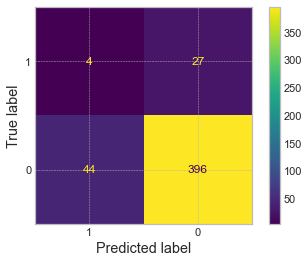

In [86]:

param_grid = {'classifier__C': [0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16],#uniform(0.1, 20),
              'classifier__gamma': 10.0**np.arange(-3,3),
              'classifier__kernel': ['rbf','linear'],
                 'classifier__class_weight':['balanced']}
svm_pipeline = imbpipeline(verbose=True,steps = [['balancing', SMOTE(random_state=1)],
                                                 ['scaler', StandardScaler()],
                                 ['classifier', SVC(random_state=1)]])  
result['SVC Hypertuning'] =report_randomiseSearchCV(svm_pipeline, param_grid, X_train,y_train, X_test, y_test)

In [87]:
print(classification_report(y_test,result['SVC Hypertuning'][7]))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       440
           1       0.08      0.13      0.10        31

    accuracy                           0.85       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.88      0.85      0.86       471



In [88]:
printResult(result)

Training accuracy Tesing_accuracy       auc precision  \
Model                                                                   
Base SVC Model           0.986804        0.900212  0.526796  0.136364   
SVC Hypertuning          0.943431        0.849257  0.514516  0.083333   

                   recall        f1    Elapsed  
Model                                           
Base SVC Model   0.096774  0.113208   0.199867  
SVC Hypertuning  0.129032  0.101266  52.328277

### Observation: After Hypertuning
     1) Recall has increase from 0.09 to 0.129
     2) F1 Score has decreased from 0.11 to 0.10
     3) AUC Score has decrease from 0.52 to 0.51
     4) Testing accuracy is dropped

### D. Use any other technique/method which can enhance the model performance. [4 Marks]

#### Selecting Best K features  

k ==>  2
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.0s finished


Model with rank: 1
Mean validation score: 0.624 (std: 0.051)
Parameters: {'classifier__C': 94.55947559908132, 'classifier__class_weight': None, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=94.55947559908132, gamma=0.01, random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.60      0.73       440
           1       0.10      0.61      0.17        31

    accuracy                           0.60       471
   macro avg       0.53      0.60      0.45       471
weighted avg       0.90      0.60      0.70       471

k ==>  3
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.2s finished


Model with rank: 1
Mean validation score: 0.617 (std: 0.060)
Parameters: {'classifier__C': 10.639125153469719, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=10.639125153469719, class_weight='balanced',
                     gamma=0.0001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.49      0.65       440
           1       0.09      0.71      0.16        31

    accuracy                           0.50       471
   macro avg       0.52      0.60      0.40       471
weighted avg       0.90      0.50      0.61       471

k ==>  4
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.9s finished


Model with rank: 1
Mean validation score: 0.608 (std: 0.076)
Parameters: {'classifier__C': 26.1315098578541, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=26.1315098578541, class_weight='balanced', gamma=0.0001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.52      0.68       440
           1       0.09      0.71      0.17        31

    accuracy                           0.54       471
   macro avg       0.53      0.62      0.42       471
weighted avg       0.91      0.54      0.64       471

k ==>  5
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.1s finished


Model with rank: 1
Mean validation score: 0.600 (std: 0.062)
Parameters: {'classifier__C': 13.745522566068502, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=13.745522566068502, class_weight='balanced', gamma=0.001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       440
           1       0.10      0.68      0.17        31

    accuracy                           0.56       471
   macro avg       0.53      0.61      0.43       471
weighted avg       0.90      0.56      0.67       471

k ==>  6
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.5s finished


Model with rank: 1
Mean validation score: 0.611 (std: 0.069)
Parameters: {'classifier__C': 65.53237716895042, 'classifier__class_weight': None, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=65.53237716895042, gamma=0.001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       440
           1       0.10      0.71      0.17        31

    accuracy                           0.56       471
   macro avg       0.53      0.63      0.44       471
weighted avg       0.91      0.56      0.66       471

k ==>  7
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.7s finished


Model with rank: 1
Mean validation score: 0.609 (std: 0.053)
Parameters: {'classifier__C': 95.00163206876164, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=95.00163206876164, class_weight='balanced', gamma=0.0001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.95      0.52      0.67       440
           1       0.09      0.65      0.15        31

    accuracy                           0.53       471
   macro avg       0.52      0.58      0.41       471
weighted avg       0.90      0.53      0.64       471

k ==>  8
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.7s finished


Model with rank: 1
Mean validation score: 0.610 (std: 0.060)
Parameters: {'classifier__C': 46.83926831470522, 'classifier__class_weight': None, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=46.83926831470522, gamma=0.001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.53      0.69       440
           1       0.10      0.71      0.17        31

    accuracy                           0.55       471
   macro avg       0.53      0.62      0.43       471
weighted avg       0.91      0.55      0.65       471

k ==>  9
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.4s finished


Model with rank: 1
Mean validation score: 0.605 (std: 0.061)
Parameters: {'classifier__C': 7.479201140065461, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=7.479201140065461, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       440
           1       0.11      0.58      0.18        31

    accuracy                           0.65       471
   macro avg       0.53      0.62      0.48       471
weighted avg       0.90      0.65      0.74       471

k ==>  10
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.7s finished


Model with rank: 1
Mean validation score: 0.592 (std: 0.052)
Parameters: {'classifier__C': 22.67093386078547, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=22.67093386078547, class_weight='balanced', gamma=0.0001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.50      0.66       440
           1       0.09      0.71      0.16        31

    accuracy                           0.52       471
   macro avg       0.53      0.61      0.41       471
weighted avg       0.90      0.52      0.63       471

k ==>  11
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.4s finished


Model with rank: 1
Mean validation score: 0.593 (std: 0.060)
Parameters: {'classifier__C': 10.639125153469719, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=10.639125153469719, class_weight='balanced',
                     gamma=0.0001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.47      0.64       440
           1       0.09      0.77      0.17        31

    accuracy                           0.49       471
   macro avg       0.53      0.62      0.40       471
weighted avg       0.91      0.49      0.60       471

k ==>  12
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.7s finished


Model with rank: 1
Mean validation score: 0.587 (std: 0.061)
Parameters: {'classifier__C': 10.639125153469719, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=10.639125153469719, class_weight='balanced',
                     gamma=0.0001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.50      0.66       440
           1       0.10      0.74      0.17        31

    accuracy                           0.52       471
   macro avg       0.53      0.62      0.41       471
weighted avg       0.91      0.52      0.63       471

k ==>  13
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.1s finished


Model with rank: 1
Mean validation score: 0.585 (std: 0.057)
Parameters: {'classifier__C': 41.35388415030261, 'classifier__class_weight': None, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=41.35388415030261, gamma=0.0001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.53      0.69       440
           1       0.10      0.74      0.18        31

    accuracy                           0.55       471
   macro avg       0.53      0.64      0.43       471
weighted avg       0.91      0.55      0.65       471

k ==>  14
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.7s finished


Model with rank: 1
Mean validation score: 0.579 (std: 0.062)
Parameters: {'classifier__C': 4.555187854476172, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=4.555187854476172, class_weight='balanced', gamma=0.001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.53      0.68       440
           1       0.10      0.77      0.18        31

    accuracy                           0.54       471
   macro avg       0.54      0.65      0.43       471
weighted avg       0.91      0.54      0.65       471

k ==>  15
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.1s finished


Model with rank: 1
Mean validation score: 0.581 (std: 0.063)
Parameters: {'classifier__C': 22.31245475353748, 'classifier__class_weight': None, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=22.31245475353748, gamma=0.001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       440
           1       0.10      0.61      0.17        31

    accuracy                           0.61       471
   macro avg       0.53      0.61      0.46       471
weighted avg       0.90      0.61      0.71       471

k ==>  16
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.5s finished


Model with rank: 1
Mean validation score: 0.581 (std: 0.073)
Parameters: {'classifier__C': 41.802200470257404, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=41.802200470257404, class_weight='balanced', gamma=0.001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       440
           1       0.10      0.55      0.17        31

    accuracy                           0.65       471
   macro avg       0.53      0.60      0.48       471
weighted avg       0.90      0.65      0.74       471

k ==>  17
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.8s finished


Model with rank: 1
Mean validation score: 0.572 (std: 0.052)
Parameters: {'classifier__C': 74.81216427371845, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=74.81216427371845, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       440
           1       0.15      0.26      0.19        31

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.87       471

k ==>  18
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.2s finished


Model with rank: 1
Mean validation score: 0.580 (std: 0.043)
Parameters: {'classifier__C': 74.81216427371845, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=74.81216427371845, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       440
           1       0.11      0.13      0.12        31

    accuracy                           0.87       471
   macro avg       0.52      0.53      0.52       471
weighted avg       0.88      0.87      0.88       471

k ==>  19
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.6s finished


Model with rank: 1
Mean validation score: 0.568 (std: 0.031)
Parameters: {'classifier__C': 47.023852643814315, 'classifier__class_weight': None, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=47.023852643814315, gamma=0.01, random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       440
           1       0.13      0.16      0.14        31

    accuracy                           0.87       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.89      0.87      0.88       471

k ==>  20
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.1s finished


Model with rank: 1
Mean validation score: 0.579 (std: 0.027)
Parameters: {'classifier__C': 19.443428262332773, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=19.443428262332773, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       440
           1       0.06      0.10      0.08        31

    accuracy                           0.85       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.88      0.85      0.86       471

k ==>  21
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.4s finished


Model with rank: 1
Mean validation score: 0.599 (std: 0.026)
Parameters: {'classifier__C': 29.949529475304473, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=29.949529475304473, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       440
           1       0.09      0.13      0.11        31

    accuracy                           0.86       471
   macro avg       0.51      0.52      0.51       471
weighted avg       0.88      0.86      0.87       471

k ==>  22
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.4s finished


Model with rank: 1
Mean validation score: 0.592 (std: 0.036)
Parameters: {'classifier__C': 61.02069891338239, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=61.02069891338239, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       440
           1       0.06      0.06      0.06        31

    accuracy                           0.87       471
   macro avg       0.49      0.49      0.49       471
weighted avg       0.88      0.87      0.87       471



Training accuracy Tesing_accuracy       auc  \
Model                                                                     
SVM Hypertuning +14_FEATURE          0.557482        0.543524  0.650733   
SVM Hypertuning +11_FEATURE          0.510949        0.492569   0.62346   
SVM Hypertuning +12_FEATURE          0.529197        0.518047  0.622104   
SVM Hypertuning +13_FEATURE          0.562044        0.545648  0.636877   
SVM Hypertuning +4_FEATURE           0.544708        0.535032  0.616202   
SVM Hypertuning +6_FEATURE           0.564781        0.556263  0.627566   
SVM Hypertuning +8_FEATURE           0.570255        0.545648  0.621884   
SVM Hypertuning +10_FEATURE          0.536496        0.515924  0.605975   
SVM Hypertuning +3_FEATURE           0.498175        0.501062  0.598021   
SVM Hypertuning +5_FEATURE           0.571168         0.56051  0.614846   
SVM Hypertuning +7_FEATURE            0.57208        0.528662  0.582808   
SVM Hypertuning +15_FEATURE          0.627737        0.607219  0.609861   
SVM Hypertuning +2_FEATURE            0.59854        0.596603  0.604179   
SVM Hypertuning +9_FEATURE           0.693431        0.649682  0.617595   
SVM Hypertuning +16_FEATURE          0.675182        0.653928  0.604875   
SVM Hypertuning +17_FEATURE           0.92792        0.857749  0.579032   
SVM Hypertuning +19_FEATURE           0.94708        0.874735  0.543145   
SVM Hypertuning +18_FEATURE          0.948905        0.872611  0.527016   
SVM Hypertuning +21_FEATURE          0.956204        0.855626  0.517925   
SVM Hypertuning +20_FEATURE          0.930657        0.845011  0.497251   
SVM Hypertuning +22_FEATURE          0.983577        0.866242  0.493622   

                            precision    recall        f1    Elapsed  
Model                                                                 
SVM Hypertuning +14_FEATURE  0.103448  0.774194   0.18251  15.288967  
SVM Hypertuning +11_FEATURE   0.09375  0.774194  0.167247  15.099956  
SVM Hypertuning +12_FEATURE  0.095041  0.741935  0.168498  14.406983  
SVM Hypertuning +13_FEATURE  0.100437  0.741935  0.176923  14.654403  
SVM Hypertuning +4_FEATURE   0.094828  0.709677    0.1673  12.317513  
SVM Hypertuning +6_FEATURE   0.099099  0.709677  0.173913  12.016744  
SVM Hypertuning +8_FEATURE   0.096916  0.709677  0.170543  13.255414  
SVM Hypertuning +10_FEATURE  0.091286  0.709677  0.161765  13.350463  
SVM Hypertuning +3_FEATURE    0.08871  0.709677  0.157706  12.776232  
SVM Hypertuning +5_FEATURE    0.09633  0.677419  0.168675  11.562091  
SVM Hypertuning +7_FEATURE    0.08658  0.645161  0.152672  12.267401  
SVM Hypertuning +15_FEATURE  0.098958  0.612903  0.170404  15.602053  
SVM Hypertuning +2_FEATURE   0.096447  0.612903  0.166667  13.429002  
SVM Hypertuning +9_FEATURE   0.105882  0.580645  0.179104  12.952153  
SVM Hypertuning +16_FEATURE   0.10241  0.548387  0.172589  16.196505  
SVM Hypertuning +17_FEATURE  0.153846  0.258065  0.192771  16.366733  
SVM Hypertuning +19_FEATURE  0.131579   0.16129  0.144928  17.048694  
SVM Hypertuning +18_FEATURE  0.108108  0.129032  0.117647  16.686951  
SVM Hypertuning +21_FEATURE  0.088889  0.129032  0.105263   17.92348  
SVM Hypertuning +20_FEATURE    0.0625  0.096774  0.075949  17.522927  
SVM Hypertuning +22_FEATURE  0.055556  0.064516  0.059701  18.830044

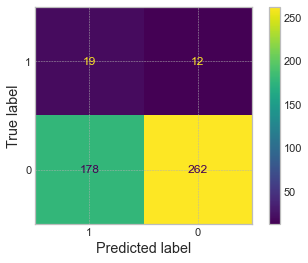

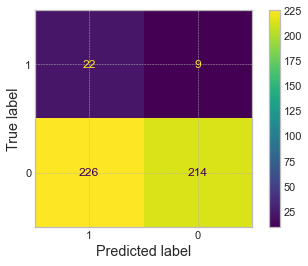

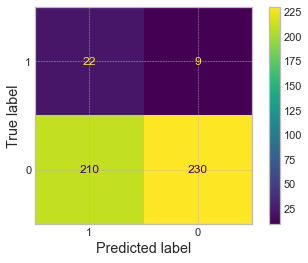

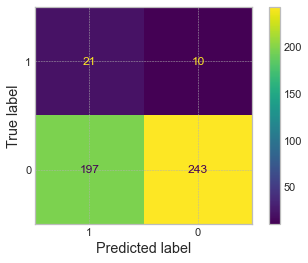

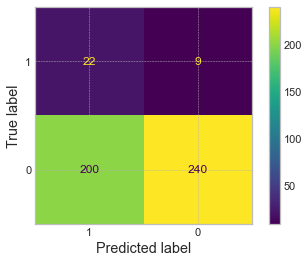

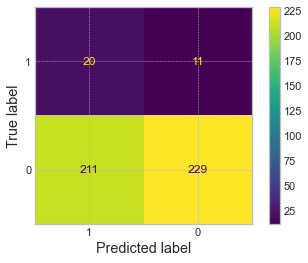

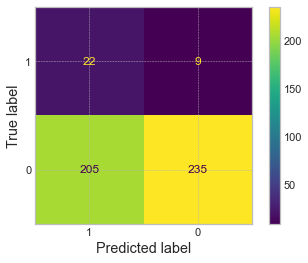

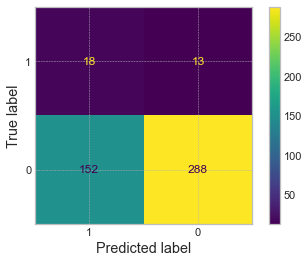

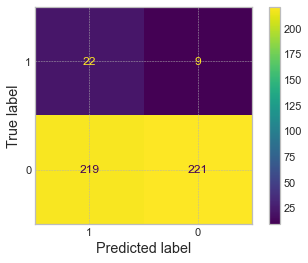

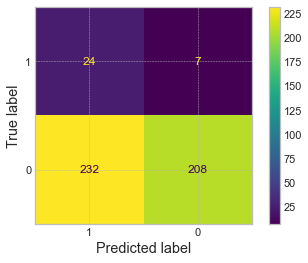

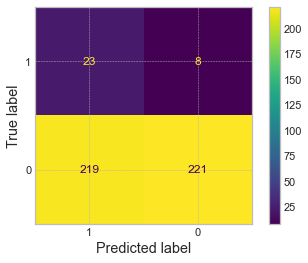

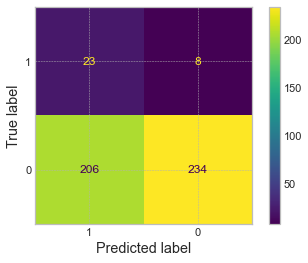

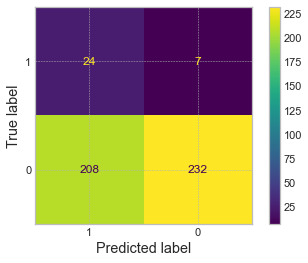

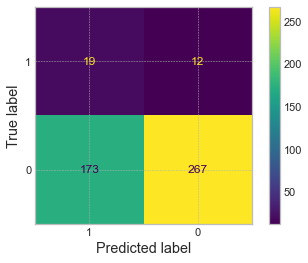

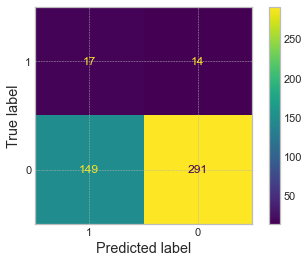

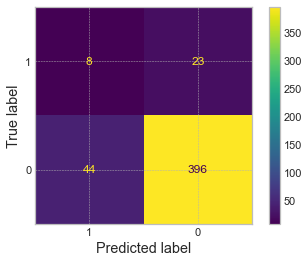

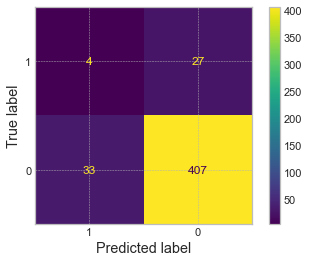

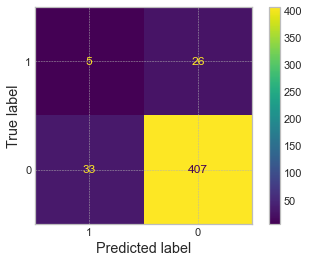

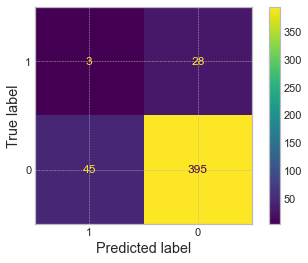

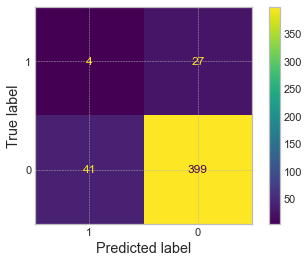

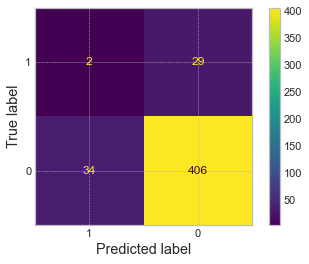

In [89]:
feature_result={}
for i in list(range(2,23)):
    print("k ==> ",i)
    minmaxScaler = MinMaxScaler()
    X_train_min_max = minmaxScaler.fit_transform(X_train)
    chi2_selector =SelectKBest(chi2, k=i)
    kbest= chi2_selector.fit_transform(X_train_min_max, y_train)
    select_features_Df = pd.DataFrame({'features': list(X_train.columns),
                                      'Scores': chi2_selector.scores_})
    select_features_Df = select_features_Df.sort_values(by='Scores', ascending=False)
    subsetColumnList = list(np.take(X_train.columns, np.where(chi2_selector.get_support()==True)))
    svm_feature_Selection_pipeline = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', SVC(random_state=1)]])
    param_grid = {'classifier__C': uniform(0.1,100),
                  'classifier__gamma': [30,20,10,5,3,1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ['rbf'],
                 'classifier__class_weight':["balanced", None]}
    model_name = 'SVM Hypertuning +' + str(i) +'_FEATURE'
    feature_result[model_name] =report_randomiseSearchCV(svm_feature_Selection_pipeline, param_grid, X_train.loc[:,subsetColumnList], y_train, X_test.loc[:,subsetColumnList], y_test)
    print(classification_report(y_test, feature_result[model_name][7]))
printResult(feature_result).sort_values(by = 'recall', ascending=False)

In [90]:
printResult(feature_result).sort_values(by = 'auc', ascending=False)

Training accuracy Tesing_accuracy       auc  \
Model                                                                     
SVM Hypertuning +14_FEATURE          0.557482        0.543524  0.650733   
SVM Hypertuning +13_FEATURE          0.562044        0.545648  0.636877   
SVM Hypertuning +6_FEATURE           0.564781        0.556263  0.627566   
SVM Hypertuning +11_FEATURE          0.510949        0.492569   0.62346   
SVM Hypertuning +12_FEATURE          0.529197        0.518047  0.622104   
SVM Hypertuning +8_FEATURE           0.570255        0.545648  0.621884   
SVM Hypertuning +9_FEATURE           0.693431        0.649682  0.617595   
SVM Hypertuning +4_FEATURE           0.544708        0.535032  0.616202   
SVM Hypertuning +5_FEATURE           0.571168         0.56051  0.614846   
SVM Hypertuning +15_FEATURE          0.627737        0.607219  0.609861   
SVM Hypertuning +10_FEATURE          0.536496        0.515924  0.605975   
SVM Hypertuning +16_FEATURE          0.675182        0.653928  0.604875   
SVM Hypertuning +2_FEATURE            0.59854        0.596603  0.604179   
SVM Hypertuning +3_FEATURE           0.498175        0.501062  0.598021   
SVM Hypertuning +7_FEATURE            0.57208        0.528662  0.582808   
SVM Hypertuning +17_FEATURE           0.92792        0.857749  0.579032   
SVM Hypertuning +19_FEATURE           0.94708        0.874735  0.543145   
SVM Hypertuning +18_FEATURE          0.948905        0.872611  0.527016   
SVM Hypertuning +21_FEATURE          0.956204        0.855626  0.517925   
SVM Hypertuning +20_FEATURE          0.930657        0.845011  0.497251   
SVM Hypertuning +22_FEATURE          0.983577        0.866242  0.493622   

                            precision    recall        f1    Elapsed  
Model                                                                 
SVM Hypertuning +14_FEATURE  0.103448  0.774194   0.18251  15.288967  
SVM Hypertuning +13_FEATURE  0.100437  0.741935  0.176923  14.654403  
SVM Hypertuning +6_FEATURE   0.099099  0.709677  0.173913  12.016744  
SVM Hypertuning +11_FEATURE   0.09375  0.774194  0.167247  15.099956  
SVM Hypertuning +12_FEATURE  0.095041  0.741935  0.168498  14.406983  
SVM Hypertuning +8_FEATURE   0.096916  0.709677  0.170543  13.255414  
SVM Hypertuning +9_FEATURE   0.105882  0.580645  0.179104  12.952153  
SVM Hypertuning +4_FEATURE   0.094828  0.709677    0.1673  12.317513  
SVM Hypertuning +5_FEATURE    0.09633  0.677419  0.168675  11.562091  
SVM Hypertuning +15_FEATURE  0.098958  0.612903  0.170404  15.602053  
SVM Hypertuning +10_FEATURE  0.091286  0.709677  0.161765  13.350463  
SVM Hypertuning +16_FEATURE   0.10241  0.548387  0.172589  16.196505  
SVM Hypertuning +2_FEATURE   0.096447  0.612903  0.166667  13.429002  
SVM Hypertuning +3_FEATURE    0.08871  0.709677  0.157706  12.776232  
SVM Hypertuning +7_FEATURE    0.08658  0.645161  0.152672  12.267401  
SVM Hypertuning +17_FEATURE  0.153846  0.258065  0.192771  16.366733  
SVM Hypertuning +19_FEATURE  0.131579   0.16129  0.144928  17.048694  
SVM Hypertuning +18_FEATURE  0.108108  0.129032  0.117647  16.686951  
SVM Hypertuning +21_FEATURE  0.088889  0.129032  0.105263   17.92348  
SVM Hypertuning +20_FEATURE    0.0625  0.096774  0.075949  17.522927  
SVM Hypertuning +22_FEATURE  0.055556  0.064516  0.059701  18.830044

### Observation : Selecting Features based on AUC curve. 14 Features are giving best AUC Score and best recall and f1 score.

In [91]:
no_of_features= 14
minmaxScaler = MinMaxScaler()
X_train_min_max = minmaxScaler.fit_transform(X_train)
chi2_selector =SelectKBest(chi2, k=no_of_features)
kbest= chi2_selector.fit_transform(X_train_min_max, y_train)
chi2_selector
select_features_Df = pd.DataFrame({'features': list(X_train.columns),
                                  'Scores': chi2_selector.scores_})
select_features_Df = select_features_Df.sort_values(by='Scores', ascending=False)
select_features_Df


features    Scores
21      511  2.549221
10      468  1.269757
20      500  0.688195
16      487  0.340167
12      483  0.214780
9       433  0.168560
7       418  0.145463
4       160  0.079711
19      499  0.072955
13      484  0.056342
15      486  0.041321
14      485  0.032338
18      489  0.029022
3       159  0.027323
5       161  0.024319
11      482  0.014156
17      488  0.011005
6       162  0.010533
1        67  0.007965
2       139  0.006202
0        24  0.005875
8       419  0.002615

#### Selecting 14 features 

In [92]:
subsetColumnList = list(np.take(X_train.columns, np.where(chi2_selector.get_support()==True)))
print('feature to be used in all the models', subsetColumnList)


feature to be used in all the models ['159', '160', '418', '433', '468', '483', '484', '485', '486', '487', '489', '499', '500', '511']


In [93]:
#### Prepare hypertuning with 14 best features

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.4s finished


Model with rank: 1
Mean validation score: 0.580 (std: 0.061)
Parameters: {'classifier__C': 5.455187854476172, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 SVC(C=5.455187854476172, class_weight='balanced', gamma=0.001,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.52      0.68       440
           1       0.10      0.77      0.18        31

    accuracy                           0.54       471
   macro avg       0.54      0.65      0.43       471
weighted avg       0.91      0.54      0.65       471



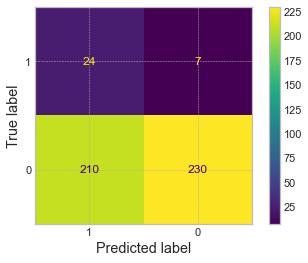

In [94]:
svm_feature_Selection_pipeline = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', SVC(random_state=1)]])
param_grid = {'classifier__C': uniform(1,100),
              'classifier__gamma': [30,20,10,5,3,1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf'],
             'classifier__class_weight':["balanced", None]}
model_name = 'SVM Hypertuning +'+ str(no_of_features)+'_FEATURE'
result[model_name] =report_randomiseSearchCV(svm_feature_Selection_pipeline, param_grid, X_train.loc[:,subsetColumnList], y_train, X_test.loc[:,subsetColumnList], y_test)
print(classification_report(y_test, result[model_name][7]))

In [95]:
printResult(result)

Training accuracy Tesing_accuracy       auc  \
Model                                                                     
Base SVC Model                       0.986804        0.900212  0.526796   
SVC Hypertuning                      0.943431        0.849257  0.514516   
SVM Hypertuning +14_FEATURE          0.562044        0.539278   0.64846   

                            precision    recall        f1    Elapsed  
Model                                                                 
Base SVC Model               0.136364  0.096774  0.113208   0.199867  
SVC Hypertuning              0.083333  0.129032  0.101266  52.328277  
SVM Hypertuning +14_FEATURE  0.102564  0.774194  0.181132  15.985125

In [96]:
#### Apply PCA on SVC with 14 features

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.2s finished


Model with rank: 1
Mean validation score: 0.584 (std: 0.071)
Parameters: {'classifier__C': 23.21245475353748, 'classifier__class_weight': None, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 SVC(C=23.21245475353748, gamma=0.001, random_state=1)]])
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       440
           1       0.10      0.74      0.18        31

    accuracy                           0.56       471
   macro avg       0.54      0.64      0.44       471
weighted avg       0.91      0.56      0.67       471



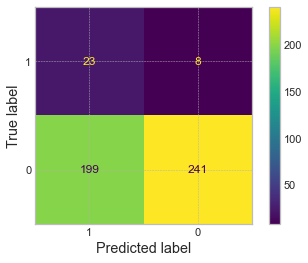

In [97]:
svm_pca_smote = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', SVC(random_state=1)],
                                    ])
param_grid = {'classifier__C': uniform(1,100),
              'classifier__gamma': [30,20,10,5,3,1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf'],
             'classifier__class_weight':["balanced", None]}
model_name = 'SVM Hypertuning + PCA +'+ str(no_of_features)+'_FEATURE'
result[model_name] =report_randomiseSearchCV(svm_pca_smote, param_grid, X_train.loc[:,subsetColumnList], y_train, X_test.loc[:,subsetColumnList], y_test)
print(classification_report(y_test, result[model_name][7]))

In [98]:
#### Apply PCA on SVC model on all features 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.8s finished


Model with rank: 1
Mean validation score: 0.585 (std: 0.036)
Parameters: {'classifier__C': 20.343428262332772, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 SVC(C=20.343428262332772, class_weight='balanced', gamma=0.01,
                     random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       440
           1       0.12      0.19      0.15        31

    accuracy                           0.85       471
   macro avg       0.53      0.55      0.53       471
weighted avg       0.89      0.85      0.87       471



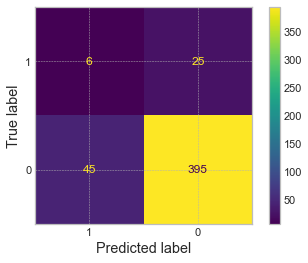

In [99]:
svm_pca_smote = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', SVC(random_state=1)],
                                    ])
param_grid = {'classifier__C': uniform(1,100),
              'classifier__gamma': [30,20,10,5,3,1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf'],
             'classifier__class_weight':["balanced", None]}
model_name = 'SVM Hypertuning + PCA'
result[model_name] =report_randomiseSearchCV(svm_pca_smote, param_grid, X_train, y_train, X_test, y_test)
print(classification_report(y_test, result[model_name][7]))

In [100]:
printResult(result)

Training accuracy Tesing_accuracy       auc  \
Model                                                                           
Base SVC Model                             0.986804        0.900212  0.526796   
SVC Hypertuning                            0.943431        0.849257  0.514516   
SVM Hypertuning +14_FEATURE                0.562044        0.539278   0.64846   
SVM Hypertuning + PCA +14_FEATURE           0.57938         0.56051  0.644831   
SVM Hypertuning + PCA                      0.941606         0.85138  0.545638   

                                  precision    recall        f1    Elapsed  
Model                                                                       
Base SVC Model                     0.136364  0.096774  0.113208   0.199867  
SVC Hypertuning                    0.083333  0.129032  0.101266  52.328277  
SVM Hypertuning +14_FEATURE        0.102564  0.774194  0.181132  15.985125  
SVM Hypertuning + PCA +14_FEATURE  0.103604  0.741935  0.181818  15.920769  
SVM Hypertuning + PCA              0.117647  0.193548  0.146341  18.271321

### Recall , AUC , f1 are coming good when 14 feature are selecting. It has been jumped to 77%
### After apply PCA on 14 features, and take 95% variance , recall slightly dropped by 3%. f1 and AUC is almost same.
### model (SVM Hypertuning + PCA) Without Feature selection,  is giving poor result.
### If taking 14 features, recall value is coming good result.


### F. Apply the above steps for all possible models that you have learnt so far. 

In [101]:
pipeline_dt_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        #['pca', PCA(0.95)],
                                        ['classifier', DecisionTreeClassifier(random_state=1)]])
pipeline_dt_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', DecisionTreeClassifier(random_state=1)]])

pipeline_lr_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', LogisticRegression(random_state=1)]])
pipeline_lr_with_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', LogisticRegression(random_state=1)]])
pipeline_knn_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', KNeighborsClassifier()]])
pipeline_knn_with_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', KNeighborsClassifier()]])
pipeline_RC_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', RandomForestClassifier(random_state=1)]])
pipeline_RC_with_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', RandomForestClassifier(random_state=1)]])
pipeline_gradient_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', GradientBoostingClassifier(random_state=1)]])
pipeline_gradient_with_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', GradientBoostingClassifier(random_state=1)]])
pipeline_xgboost_without_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['classifier', XGBClassifier(random_state=1)]])
pipeline_xgboost_with_PCA = imbpipeline(steps = [['balancing', SMOTE(random_state=1)],
                                        ['scaler', StandardScaler()],
                                        ['pca', PCA(0.95)],
                                        ['classifier', XGBClassifier(random_state=1)]])


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model with rank: 1
Mean validation score: 0.586 (std: 0.060)
Parameters: {'classifier__splitter': 'random', 'classifier__min_samples_split': 11, 'classifier__min_samples_leaf': 8, 'classifier__max_leaf_nodes': 600, 'classifier__max_depth': 10, 'classifier__criterion': 'gini', 'classifier__class_weight': 'balanced'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        max_leaf_nodes=600, min_samples_leaf=8,
                                        min_samples_split=11, random_state=1,
                                        splitter='random')]])
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       440
           1       0.09      0.45      0.16        31

    accuracy                           0.68       471
   macro avg       0.52      0.57 

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model with rank: 1
Mean validation score: 0.558 (std: 0.050)
Parameters: {'classifier__splitter': 'best', 'classifier__min_samples_split': 8, 'classifier__min_samples_leaf': 3, 'classifier__max_leaf_nodes': 150, 'classifier__max_depth': 30, 'classifier__criterion': 'gini', 'classifier__class_weight': None}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 DecisionTreeClassifier(max_depth=30, max_leaf_nodes=150,
                                        min_samples_leaf=3, min_samples_split=8,
                                        random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       440
           1       0.08      0.23      0.12        31

    accuracy                           0.79       471
   macro avg       0.51      0.53      0.50       471
weighted avg       0.88      0.79      0.

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model with rank: 1
Mean validation score: 0.572 (std: 0.062)
Parameters: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'l2', 'classifier__class_weight': 'balanced', 'classifier__C': 1.0}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 LogisticRegression(class_weight='balanced', random_state=1,
                                    solver='newton-cg')]])
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       440
           1       0.10      0.61      0.16        31

    accuracy                           0.59       471
   macro avg       0.53      0.60      0.45       471
weighted avg       0.90      0.59      0.69       471

---------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model with rank: 1
Mean validation score: 0.588 (std: 0.059)
Parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__class_weight': 'balanced', 'classifier__C': 0.03}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 LogisticRegression(C=0.03, class_weight='balanced',
                                    penalty='l1', random_state=1,
                                    solver='saga')]])
              precision    recall  f1-score   support

           0       0.96      0.58      0.72       440
           1       0.09      0.61      0.16        31

    accuracy                           0.58       471
   macro avg       0.52      0.60      0.44       471
weighted avg       0.90      0.58      0.68       471

---------------------------------------------------------------------------
Fitting 5 folds for each of 60 candidates, tota

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.7s finished


Model with rank: 1
Mean validation score: 0.514 (std: 0.053)
Parameters: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 17, 'classifier__metric': 'manhattan'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=17)]])
              precision    recall  f1-score   support

           0       0.96      0.54      0.69       440
           1       0.09      0.65      0.16        31

    accuracy                           0.55       471
   macro avg       0.52      0.59      0.42       471
weighted avg       0.90      0.55      0.66       471

---------------------------------------------------------------------------
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.8s finished


Model with rank: 1
Mean validation score: 0.498 (std: 0.056)
Parameters: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 19, 'classifier__metric': 'manhattan'}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=19)]])
              precision    recall  f1-score   support

           0       0.94      0.50      0.66       440
           1       0.08      0.58      0.13        31

    accuracy                           0.51       471
   macro avg       0.51      0.54      0.40       471
weighted avg       0.89      0.51      0.62       471

---------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


Model with rank: 1
Mean validation score: 0.592 (std: 0.064)
Parameters: {'classifier__n_estimators': 240, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 91, 'classifier__bootstrap': False}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=91,
                                        max_features='sqrt', min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=240,
                                        random_state=1)]])
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       440
           1       0.12      0.06      0.09        31

    accuracy                           0.91       471
   macro avg       0.53      0.52      0.52       471
weighted avg       0.88      0.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


Model with rank: 1
Mean validation score: 0.534 (std: 0.046)
Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 61, 'classifier__bootstrap': False}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=61,
                                        max_features='sqrt', min_samples_leaf=2,
                                        min_samples_split=5, random_state=1)]])
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       440
           1       0.07      0.06      0.07        31

    accuracy                           0.89       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.88      0.89      0.88       471

-

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.2min finished


Model with rank: 1
Mean validation score: 0.629 (std: 0.045)
Parameters: {'classifier__subsample': 0.95, 'classifier__n_estimators': 1100, 'classifier__min_samples_split': 40, 'classifier__min_samples_leaf': 23, 'classifier__max_features': 5, 'classifier__max_depth': 17, 'classifier__learning_rate': 4}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 GradientBoostingClassifier(learning_rate=4, max_depth=17,
                                            max_features=5, min_samples_leaf=23,
                                            min_samples_split=40,
                                            n_estimators=1100, random_state=1,
                                            subsample=0.95)]])
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       440
           1       0.04      0.16      0.06        31

    accuracy                        

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


Model with rank: 1
Mean validation score: 0.574 (std: 0.077)
Parameters: {'classifier__subsample': 0.85, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 9, 'classifier__max_features': 5, 'classifier__max_depth': 15, 'classifier__learning_rate': 12}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 GradientBoostingClassifier(learning_rate=12, max_depth=15,
                                            max_features=5, min_samples_leaf=9,
                                            min_samples_split=80,
                                            random_state=1, subsample=0.85)]])
              precision    recall  f1-score   support

           0       0.93      0.58      0.72       440
           1       0.07      0.42      0.11        31

    accuracy                           0.57       471
   macro avg 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


Model with rank: 1
Mean validation score: 0.615 (std: 0.080)
Parameters: {'classifier__subsample': 0.2, 'classifier__n_estimators': 600, 'classifier__max_depth': 1, 'classifier__learning_rate': 15, 'classifier__gamma': 1.4, 'classifier__colsample_bytree': 0.4}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()),
                ['classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.4, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=1.4, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=15, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
       

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Model with rank: 1
Mean validation score: 0.546 (std: 0.060)
Parameters: {'classifier__subsample': 0.6, 'classifier__n_estimators': 400, 'classifier__max_depth': 40, 'classifier__learning_rate': 20, 'classifier__gamma': 1.4, 'classifier__colsample_bytree': 0.5}

Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ['classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=1.4, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=20, max_bin=256,
                               max_cat_to_o

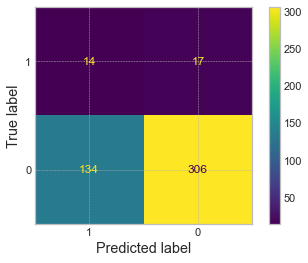

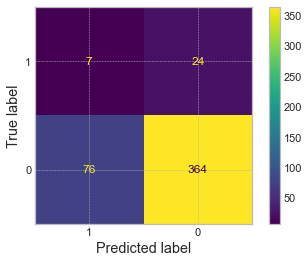

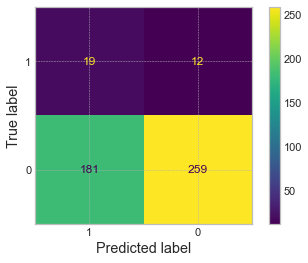

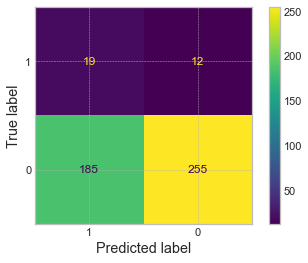

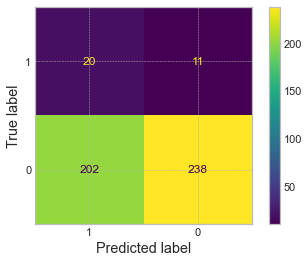

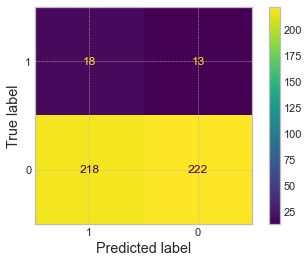

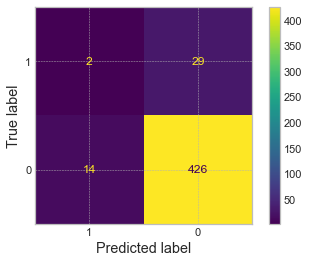

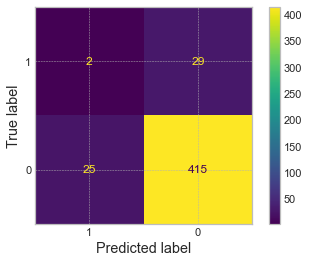

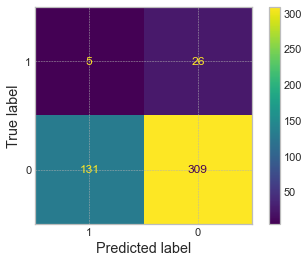

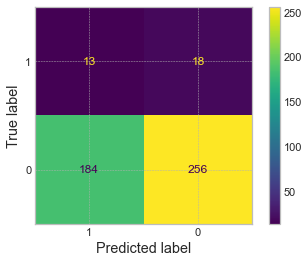

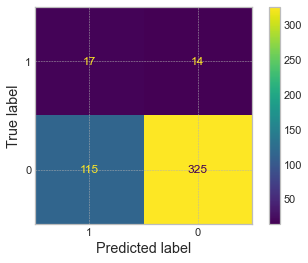

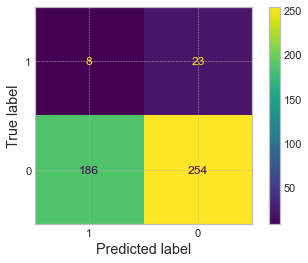

In [102]:

base_models = [
    {
        "name": 'Decision Tree',
        'pipeline': pipeline_dt_without_PCA,
        'param': {
                     'classifier__criterion':['gini', 'entropy'],
                     'classifier__splitter': ['best', 'random'],
                     'classifier__max_depth': [2,4,5,6,7,8,9,10,12,14,15,16,17,18,19,20,21,22,23,25,None],
                     'classifier__max_leaf_nodes': [1,5,10,100,130,140,150,160,170,180,190,200,240, 250,260, 280, 300, 500,600,700,1000, None],
                     'classifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,12,15,20, 30, 40, 50],
                     'classifier__min_samples_split': [2,5,8,9,10,11,12,15,20,25,28,29, 30,31,32,35, 40, 50],
                     'classifier__class_weight':['balanced', None]
                } 
    },
    {
        "name": 'Decision Tree + PCA',
        'pipeline': pipeline_dt_PCA,
        'param': {
                     'classifier__criterion':['gini', 'entropy'],
                     'classifier__splitter': ['best', 'random'],
                     'classifier__max_depth': [2,4,5,6,7,8,9,10,12,14,15,16,17,18,19,20,21,22,23,25,30,40,50,60,100,200,300,None],
                     'classifier__max_leaf_nodes': [1,5,10,100,130,140,150,160,170,180,190,200,240, 250,260, 280, 300, 500,600,700,1000, None],
                     'classifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,12,15,20, 30, 40, 50],
                     'classifier__min_samples_split': [2,5,8,9,10,11,12,15,20,25,28,29, 30,31,32,35, 40, 50],
                     'classifier__class_weight':['balanced', None]
                } 
    },
    {
        "name": "Logistic Regression",
        'pipeline': pipeline_lr_without_PCA,
        'param':  {
                      'classifier__penalty' : ['l1', 'l2', 'elasticnet'],
                       'classifier__C' : [100, 10, 3,2,1.0, 0.1, 0.05,0.02,0.01,0.001],# np.logspace(-5, 8, 15)
                       'classifier__solver' : ['lbfgs','liblinear','newton-cg', 'sag', 'saga'],
                       'classifier__class_weight': ['balanced',None] 
                }
        },
        {
        "name": "Logistic Regression + PCA",
        'pipeline': pipeline_lr_with_PCA,
        'param':  {
                      'classifier__penalty' : ['l1', 'l2', 'elasticnet'],
                       'classifier__C' : [100, 10, 1.0, 0.2, 0.1,0.09,0.06, 0.05,0.03,0.02,0.01,0.001],# np.logspace(-5, 8, 15)
                       'classifier__solver' : ['lbfgs','liblinear','newton-cg', 'sag', 'saga'],
                       'classifier__class_weight': ['balanced',None]
                }
        },
         {
        "name": "KNeighborsClassifier",
        'pipeline': pipeline_knn_without_PCA,
        'param':  {
                      'classifier__n_neighbors': list(range(1, 20, 2)),
                      'classifier__weights' : ['uniform', 'distance'],
                      'classifier__metric' : ['euclidean', 'manhattan', 'minkowski']  
                        
                }
        },
            {
        "name": "KNeighborsClassifier + PCA",
        'pipeline': pipeline_knn_with_PCA,
        'param':  {
                      'classifier__n_neighbors': list(range(1, 21, 2)),
                      'classifier__weights' : ['uniform', 'distance'],
                      'classifier__metric' : ['euclidean', 'manhattan', 'minkowski']  
                        
                }
        },
    
        {
          "name": "RandomForestClassifier",
        'pipeline': pipeline_RC_without_PCA,
        'param':  {
                       'classifier__n_estimators' : [100,150, 200,240,250,260,270,300],
                      'classifier__max_features' : ['sqrt', 'log2'],
                      'classifier__max_depth' : [int(x) for x in np.linspace(10, 110, num = 100)] ,
                      'classifier__min_samples_split' : [2,3,4, 5,6,7,8, 10],
                      'classifier__min_samples_leaf' : [1, 2, 4],
                       'classifier__bootstrap' : [True, False]
                        
                }  
        },
    
        {
          "name": "RandomForestClassifier + PCA",
        'pipeline': pipeline_RC_with_PCA,
        'param':  {
                      'classifier__n_estimators' : [100,150, 200,240,250,260,270,300],
                      'classifier__max_features' : ['sqrt', 'log2'],
                      'classifier__max_depth' : [int(x) for x in np.linspace(10, 110, num = 100)] ,
                      'classifier__min_samples_split' : [2,3,4, 5,6,7,8, 10],
                      'classifier__min_samples_leaf' : [1, 2, 4],
                       'classifier__bootstrap' : [True, False]
                        
                }  
        },
            {
          "name": "GradientBoostingClassifier",
          'pipeline': pipeline_gradient_without_PCA,
          'param':  {
                     "classifier__n_estimators":[100,1100,1200,1300],
                    "classifier__max_depth":[1,3,5,7,9,15,17,20,25],
                    "classifier__learning_rate":[0.01,0.1,0.25,0.5,1,2,3,4,5,6,7,8,10,100],
                    'classifier__min_samples_split':[2,4,6,8,10,13,15,17,20,30,35,40,45,50,60,100],
                     'classifier__min_samples_leaf':[1,3,5,7,9,11,13,15,21,23,25],
                     'classifier__max_features':[2,3,4,5,6,7],
                      'classifier__subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
                    }  
        },
         {
          "name": "GradientBoostingClassifier with  PCA",
          'pipeline': pipeline_gradient_with_PCA,
          'param':  {
                     "classifier__n_estimators":[100,130,190,200,210,250,500],
                    "classifier__max_depth":[1,3,5,7,9,11,15,20,25],
                    "classifier__learning_rate":[0.01,0.1,0.25,0.5,1,10,12,14,15,17,20,100],
                    'classifier__min_samples_split':[2,4,6,8,10,20,50,60,70,80,90,100],
                     'classifier__min_samples_leaf':[1,3,5,7,9],
                     'classifier__max_features':[2,3,4,5,6,7],
                      'classifier__subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
                    }  
        },
        {
          "name": "XGBClassifier",
          'pipeline': pipeline_xgboost_without_PCA,
          'param':  {
                    "classifier__colsample_bytree": [i/10.0 for i in range(3,7)],
                    "classifier__gamma": [i/10.0 for i in range(2,15)],
                    "classifier__learning_rate": [0.01,0.1,0.25,0.3,0.4,0.5,1,10,12,14,15,20,30], # default 0.1 
                    "classifier__max_depth": [1,3,5,7,9,11,13,15,20,25], # default 3
                    "classifier__n_estimators": [100,200,210,220,250,400, 500,600,800,900,1000],
                    "classifier__subsample": [i/10.0 for i in range(1,7)]
                    }  
        },
    
    {
          "name": "XGBClassifier + PCA",
          'pipeline': pipeline_xgboost_with_PCA,
          'param':  {
                    "classifier__colsample_bytree": [i/10.0 for i in range(3,10)],
                    "classifier__gamma": [i/10.0 for i in range(2,15)],
                    "classifier__learning_rate": [0.01,0.1,0.25,0.3,0.4,0.5,1,8,8.5, 9,9.5,10,11,12,13,14,15,20,30], # default 0.1 
                    "classifier__max_depth": [1,3,5,7,9,11,13,14,15,17,20,25,30,35,40,45,50], # default 3
                    "classifier__n_estimators": [50,100,110,120,130,140,150,200,210,220,250,350,400,420, 450,500,600,1000],
                    "classifier__subsample": [i/10.0 for i in range(1,12)]
                    }  
    }

]
Parameters: {'classifier__subsample': 0.4, 'classifier__n_estimators': 450, 'classifier__max_depth': 1, 
             'classifier__learning_rate': 12,
             'classifier__gamma': 0.7, 'classifier__colsample_bytree': 0.6}
# for model_data in base_models:
#     modelName = model_data['name']
#     model = model_data['pipeline']
#     param = model_data['param']
# #     print('Model '+ model_name +' default parameters')
# #     result[modelName] =fit_n_print(model, X_train_scale, X_test_scale, y_train_resampled, y_test)
# #     print(classification_report(y_test, result[modelName][7]))
#     print('Model '+ model_name +' hypertuned parameters')
#     result[modelName+ '_Hypertuning'] =report_randomiseSearchCV(model, param, X_train,y_train, X_test, y_test)
#     print(classification_report(y_test, result[modelName+ '_Hypertuning'][7]))
#     print('---------------------------------------------------------------------------')
for model_data in base_models:
    modelName = model_data['name']
    model = model_data['pipeline']
    param = model_data['param']
    result[modelName+ ' Hypertuning + 14 Feature'] =report_randomiseSearchCV(model, param, X_train.loc[:,subsetColumnList],y_train, X_test.loc[:,subsetColumnList], y_test)
    print(classification_report(y_test, result[modelName+ ' Hypertuning + 14 Feature'][7]))
    print('---------------------------------------------------------------------------')

In [103]:
printResult(result)

Training accuracy  \
Model                                                                  
Base SVC Model                                              0.986804   
SVC Hypertuning                                             0.943431   
SVM Hypertuning +14_FEATURE                                 0.562044   
SVM Hypertuning + PCA +14_FEATURE                            0.57938   
SVM Hypertuning + PCA                                       0.941606   
Decision Tree Hypertuning + 14 Feature                      0.764599   
Decision Tree + PCA Hypertuning + 14 Feature                0.966241   
Logistic Regression Hypertuning + 14 Feature                0.620438   
Logistic Regression + PCA Hypertuning + 14 Feature          0.604015   
KNeighborsClassifier Hypertuning + 14 Feature               0.608577   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...          0.576642   
RandomForestClassifier Hypertuning + 14 Feature                  1.0   
RandomForestClassifier + PCA Hypertuning + 14 F...               1.0   
GradientBoostingClassifier Hypertuning + 14 Fea...           0.72354   
GradientBoostingClassifier with  PCA Hypertunin...          0.586679   
XGBClassifier Hypertuning + 14 Feature                      0.712591   
XGBClassifier + PCA Hypertuning + 14 Feature                0.618613   

                                                   Tesing_accuracy       auc  \
Model                                                                          
Base SVC Model                                            0.900212  0.526796   
SVC Hypertuning                                           0.849257  0.514516   
SVM Hypertuning +14_FEATURE                               0.539278   0.64846   
SVM Hypertuning + PCA +14_FEATURE                          0.56051  0.644831   
SVM Hypertuning + PCA                                      0.85138  0.545638   
Decision Tree Hypertuning + 14 Feature                    0.679406  0.573534   
Decision Tree + PCA Hypertuning + 14 Feature              0.787686   0.52654   
Logistic Regression Hypertuning + 14 Feature              0.590234   0.60077   
Logistic Regression + PCA Hypertuning + 14 Feature        0.581741  0.596224   
KNeighborsClassifier Hypertuning + 14 Feature             0.547771  0.593035   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...        0.509554  0.542595   
RandomForestClassifier Hypertuning + 14 Feature           0.908705  0.516349   
RandomForestClassifier + PCA Hypertuning + 14 F...         0.88535  0.503849   
GradientBoostingClassifier Hypertuning + 14 Fea...        0.666667  0.431782   
GradientBoostingClassifier with  PCA Hypertunin...        0.571125  0.500587   
XGBClassifier Hypertuning + 14 Feature                    0.726115  0.643512   
XGBClassifier + PCA Hypertuning + 14 Feature              0.556263  0.417669   

                                                   precision    recall  \
Model                                                                    
Base SVC Model                                      0.136364  0.096774   
SVC Hypertuning                                     0.083333  0.129032   
SVM Hypertuning +14_FEATURE                         0.102564  0.774194   
SVM Hypertuning + PCA +14_FEATURE                   0.103604  0.741935   
SVM Hypertuning + PCA                               0.117647  0.193548   
Decision Tree Hypertuning + 14 Feature              0.094595  0.451613   
Decision Tree + PCA Hypertuning + 14 Feature        0.084337  0.225806   
Logistic Regression Hypertuning + 14 Feature           0.095  0.612903   
Logistic Regression + PCA Hypertuning + 14 Feature  0.093137  0.612903   
KNeighborsClassifier Hypertuning + 14 Feature        0.09009  0.645161   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...  0.076271  0.580645   
RandomForestClassifier Hypertuning + 14 Feature        0.125  0.064516   
RandomForestClassifier + PCA Hypertuning + 14 F...  0.074074  0.064516   
GradientBoostingClassifier Hypertuning + 14 Fea... 

In [104]:
####Plotting Confusion metric for each model.

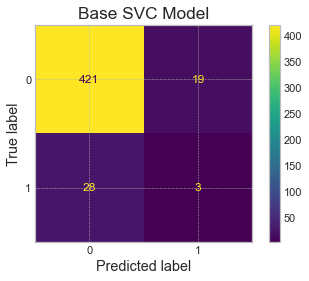

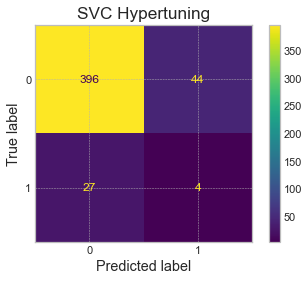

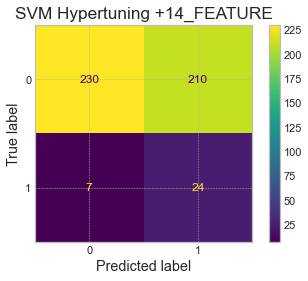

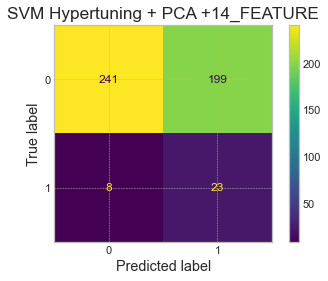

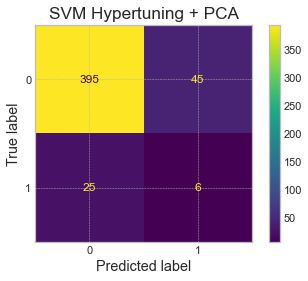

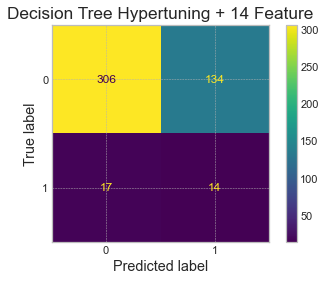

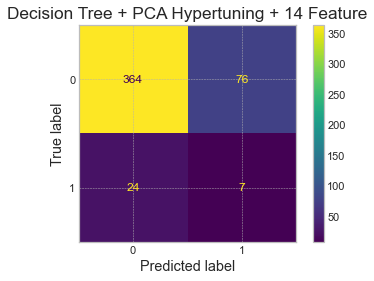

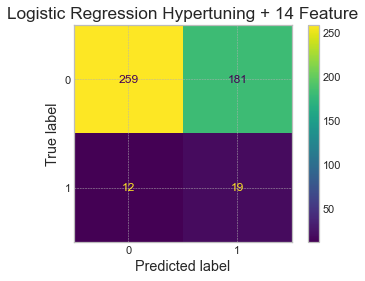

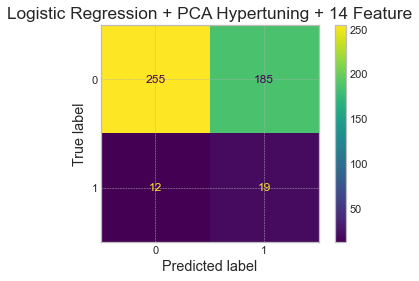

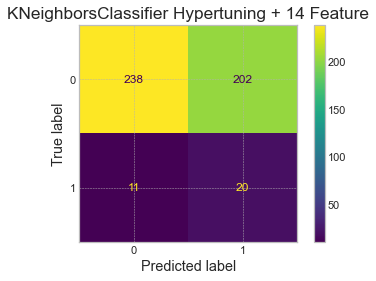

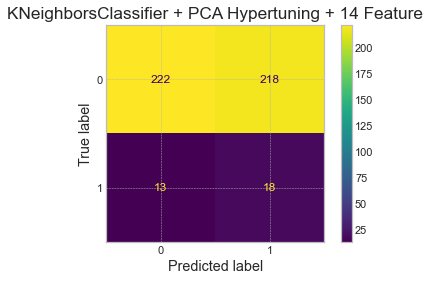

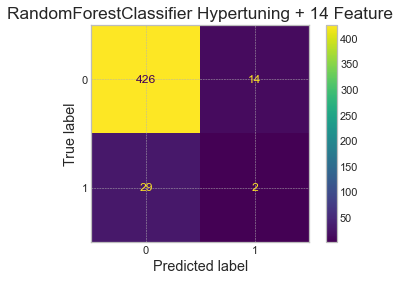

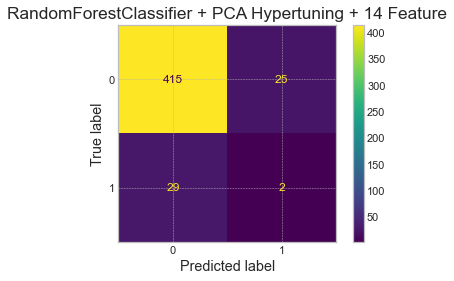

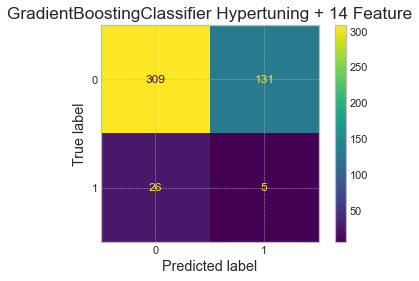

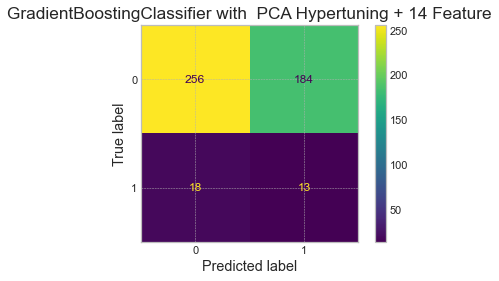

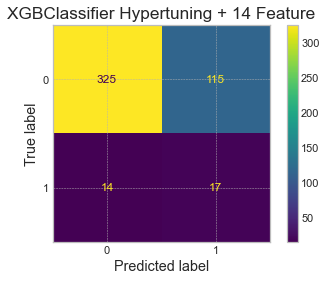

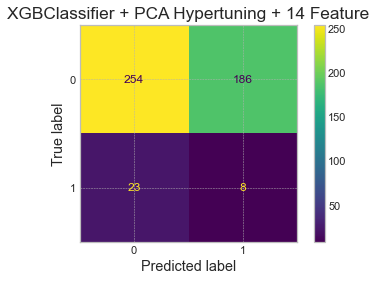

In [105]:
col=1
for model in result:
    cm = confusion_matrix(y_test, result[model][7], labels=result[model][8].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=result[model][8].classes_)
    disp.plot() 
    disp.ax_.set_title(model)


### 6. Post Training and Conclusion

### A. Display and compare all the models designed with their train and test accuracies.

In [106]:
printResult(result).sort_values(by='Tesing_accuracy', ascending=False)

Training accuracy  \
Model                                                                  
RandomForestClassifier Hypertuning + 14 Feature                  1.0   
Base SVC Model                                              0.986804   
RandomForestClassifier + PCA Hypertuning + 14 F...               1.0   
SVM Hypertuning + PCA                                       0.941606   
SVC Hypertuning                                             0.943431   
Decision Tree + PCA Hypertuning + 14 Feature                0.966241   
XGBClassifier Hypertuning + 14 Feature                      0.712591   
Decision Tree Hypertuning + 14 Feature                      0.764599   
GradientBoostingClassifier Hypertuning + 14 Fea...           0.72354   
Logistic Regression Hypertuning + 14 Feature                0.620438   
Logistic Regression + PCA Hypertuning + 14 Feature          0.604015   
GradientBoostingClassifier with  PCA Hypertunin...          0.586679   
SVM Hypertuning + PCA +14_FEATURE                            0.57938   
XGBClassifier + PCA Hypertuning + 14 Feature                0.618613   
KNeighborsClassifier Hypertuning + 14 Feature               0.608577   
SVM Hypertuning +14_FEATURE                                 0.562044   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...          0.576642   

                                                   Tesing_accuracy       auc  \
Model                                                                          
RandomForestClassifier Hypertuning + 14 Feature           0.908705  0.516349   
Base SVC Model                                            0.900212  0.526796   
RandomForestClassifier + PCA Hypertuning + 14 F...         0.88535  0.503849   
SVM Hypertuning + PCA                                      0.85138  0.545638   
SVC Hypertuning                                           0.849257  0.514516   
Decision Tree + PCA Hypertuning + 14 Feature              0.787686   0.52654   
XGBClassifier Hypertuning + 14 Feature                    0.726115  0.643512   
Decision Tree Hypertuning + 14 Feature                    0.679406  0.573534   
GradientBoostingClassifier Hypertuning + 14 Fea...        0.666667  0.431782   
Logistic Regression Hypertuning + 14 Feature              0.590234   0.60077   
Logistic Regression + PCA Hypertuning + 14 Feature        0.581741  0.596224   
GradientBoostingClassifier with  PCA Hypertunin...        0.571125  0.500587   
SVM Hypertuning + PCA +14_FEATURE                          0.56051  0.644831   
XGBClassifier + PCA Hypertuning + 14 Feature              0.556263  0.417669   
KNeighborsClassifier Hypertuning + 14 Feature             0.547771  0.593035   
SVM Hypertuning +14_FEATURE                               0.539278   0.64846   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...        0.509554  0.542595   

                                                   precision    recall  \
Model                                                                    
RandomForestClassifier Hypertuning + 14 Feature        0.125  0.064516   
Base SVC Model                                      0.136364  0.096774   
RandomForestClassifier + PCA Hypertuning + 14 F...  0.074074  0.064516   
SVM Hypertuning + PCA                               0.117647  0.193548   
SVC Hypertuning                                     0.083333  0.129032   
Decision Tree + PCA Hypertuning + 14 Feature        0.084337  0.225806   
XGBClassifier Hypertuning + 14 Feature              0.128788  0.548387   
Decision Tree Hypertuning + 14 Feature              0.094595  0.451613   
GradientBoostingClassifier Hypertuning + 14 Fea...  0.036765   0.16129   
Logistic Regression Hypertuning + 14 Feature           0.095  0.612903   
Logistic Regression + PCA Hypertuning + 14 Feature  0.093137  0.612903   
GradientBoostingClassifier with  PCA Hypertunin...   0.06599  0.419355   
SVM Hypertuning + PCA +14_FEATURE                   0.103604  0.741935   
XGBClassifier + PCA Hypertuning + 14 Feature       

### Although DataSet is imbalance. We should not focus on testing accuracy. But this question ask about the train/test accuracy.
### Testing Accuracy is high for RandomForest model with 14 Feature. This model is without pCA.
### Recall value is very low. This Model is not suitable for imbalance dataset. Its does not correctly identify the miniority classes.
### Base SVC model is giving good testing accuracy but low recall and f1. It is impected by imbalance data.
### Recall for SVC model is increase when do the hypertuning. Even it is much better when use with 14 feature and hypertuning
### Most of the high training accuracy model is overfitted. Their testing accuracy is low.
### For imbalance dataset, we should either focus on AUC or f1 score.F1 is harmonic mean of preicision and recall

### B. Select the final best trained model along with your detailed comments for selecting this model

#### Since the dataset is imbalanced. I am focusing on Auc score. More the AUC score , better the model

#### Just to check how many PCA component formed when 14 features are applied

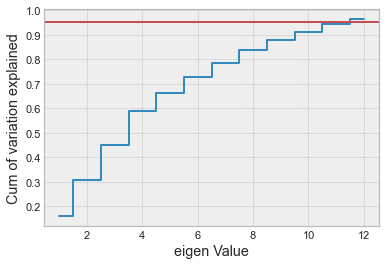

12

In [107]:
pca = PCA(0.95)
pca.fit(X_train.loc[:,subsetColumnList])
plt.step(list(range(1,13)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()
len(pca.explained_variance_ratio_)

In [108]:
printResult(result).sort_values(by='auc', ascending=False)

Training accuracy  \
Model                                                                  
SVM Hypertuning +14_FEATURE                                 0.562044   
SVM Hypertuning + PCA +14_FEATURE                            0.57938   
XGBClassifier Hypertuning + 14 Feature                      0.712591   
Logistic Regression Hypertuning + 14 Feature                0.620438   
Logistic Regression + PCA Hypertuning + 14 Feature          0.604015   
KNeighborsClassifier Hypertuning + 14 Feature               0.608577   
Decision Tree Hypertuning + 14 Feature                      0.764599   
SVM Hypertuning + PCA                                       0.941606   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...          0.576642   
Base SVC Model                                              0.986804   
Decision Tree + PCA Hypertuning + 14 Feature                0.966241   
RandomForestClassifier Hypertuning + 14 Feature                  1.0   
SVC Hypertuning                                             0.943431   
RandomForestClassifier + PCA Hypertuning + 14 F...               1.0   
GradientBoostingClassifier with  PCA Hypertunin...          0.586679   
GradientBoostingClassifier Hypertuning + 14 Fea...           0.72354   
XGBClassifier + PCA Hypertuning + 14 Feature                0.618613   

                                                   Tesing_accuracy       auc  \
Model                                                                          
SVM Hypertuning +14_FEATURE                               0.539278   0.64846   
SVM Hypertuning + PCA +14_FEATURE                          0.56051  0.644831   
XGBClassifier Hypertuning + 14 Feature                    0.726115  0.643512   
Logistic Regression Hypertuning + 14 Feature              0.590234   0.60077   
Logistic Regression + PCA Hypertuning + 14 Feature        0.581741  0.596224   
KNeighborsClassifier Hypertuning + 14 Feature             0.547771  0.593035   
Decision Tree Hypertuning + 14 Feature                    0.679406  0.573534   
SVM Hypertuning + PCA                                      0.85138  0.545638   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...        0.509554  0.542595   
Base SVC Model                                            0.900212  0.526796   
Decision Tree + PCA Hypertuning + 14 Feature              0.787686   0.52654   
RandomForestClassifier Hypertuning + 14 Feature           0.908705  0.516349   
SVC Hypertuning                                           0.849257  0.514516   
RandomForestClassifier + PCA Hypertuning + 14 F...         0.88535  0.503849   
GradientBoostingClassifier with  PCA Hypertunin...        0.571125  0.500587   
GradientBoostingClassifier Hypertuning + 14 Fea...        0.666667  0.431782   
XGBClassifier + PCA Hypertuning + 14 Feature              0.556263  0.417669   

                                                   precision    recall  \
Model                                                                    
SVM Hypertuning +14_FEATURE                         0.102564  0.774194   
SVM Hypertuning + PCA +14_FEATURE                   0.103604  0.741935   
XGBClassifier Hypertuning + 14 Feature              0.128788  0.548387   
Logistic Regression Hypertuning + 14 Feature           0.095  0.612903   
Logistic Regression + PCA Hypertuning + 14 Feature  0.093137  0.612903   
KNeighborsClassifier Hypertuning + 14 Feature        0.09009  0.645161   
Decision Tree Hypertuning + 14 Feature              0.094595  0.451613   
SVM Hypertuning + PCA                               0.117647  0.193548   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...  0.076271  0.580645   
Base SVC Model                                      0.136364  0.096774   
Decision Tree + PCA Hypertuning + 14 Feature        0.084337  0.225806   
RandomForestClassifier Hypertuning + 14 Feature        0.125  0.064516   
SVC Hypertuning                                     0.083333  0.129032   
RandomForestClassifier + PCA Hypertuning + 14 F... 

### C. Pickle the selected model for future use

##### SVC Classifier with 14 features are giving best AUC score.
##### SVC classifier is giving 12 PCA component when selected on 14 features from selecKbest and almost giving same scores when compared to 14 feature SVC classifier.
##### So SVM +PCA +Hypertuning+ 14 Feature is better than SVM +Hypertuning + 14 Feature
##### XGBClassifier Hypertuning + 14 Feature is giving better testing accuracy, better AUC, best f1 score. This model will be the best model to predict if timing is not contraint.

#####  XGBClassifier Hypertuning + 14 Feature  will be the future model 
Note: Saving the whole pipeline in the pickle file. This will make life easy for production data, otherwise user manually have to scale the data set and pass it to the model

In [109]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(result['XGBClassifier Hypertuning + 14 Feature'][8], open(filename, 'wb'))

### D. Write your conclusion on the results. [1 Marks]

In [110]:
printResult(result).sort_values(by='f1', ascending=False)

Training accuracy  \
Model                                                                  
XGBClassifier Hypertuning + 14 Feature                      0.712591   
SVM Hypertuning + PCA +14_FEATURE                            0.57938   
SVM Hypertuning +14_FEATURE                                 0.562044   
Logistic Regression Hypertuning + 14 Feature                0.620438   
Logistic Regression + PCA Hypertuning + 14 Feature          0.604015   
KNeighborsClassifier Hypertuning + 14 Feature               0.608577   
Decision Tree Hypertuning + 14 Feature                      0.764599   
SVM Hypertuning + PCA                                       0.941606   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...          0.576642   
Decision Tree + PCA Hypertuning + 14 Feature                0.966241   
GradientBoostingClassifier with  PCA Hypertunin...          0.586679   
Base SVC Model                                              0.986804   
SVC Hypertuning                                             0.943431   
RandomForestClassifier Hypertuning + 14 Feature                  1.0   
XGBClassifier + PCA Hypertuning + 14 Feature                0.618613   
RandomForestClassifier + PCA Hypertuning + 14 F...               1.0   
GradientBoostingClassifier Hypertuning + 14 Fea...           0.72354   

                                                   Tesing_accuracy       auc  \
Model                                                                          
XGBClassifier Hypertuning + 14 Feature                    0.726115  0.643512   
SVM Hypertuning + PCA +14_FEATURE                          0.56051  0.644831   
SVM Hypertuning +14_FEATURE                               0.539278   0.64846   
Logistic Regression Hypertuning + 14 Feature              0.590234   0.60077   
Logistic Regression + PCA Hypertuning + 14 Feature        0.581741  0.596224   
KNeighborsClassifier Hypertuning + 14 Feature             0.547771  0.593035   
Decision Tree Hypertuning + 14 Feature                    0.679406  0.573534   
SVM Hypertuning + PCA                                      0.85138  0.545638   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...        0.509554  0.542595   
Decision Tree + PCA Hypertuning + 14 Feature              0.787686   0.52654   
GradientBoostingClassifier with  PCA Hypertunin...        0.571125  0.500587   
Base SVC Model                                            0.900212  0.526796   
SVC Hypertuning                                           0.849257  0.514516   
RandomForestClassifier Hypertuning + 14 Feature           0.908705  0.516349   
XGBClassifier + PCA Hypertuning + 14 Feature              0.556263  0.417669   
RandomForestClassifier + PCA Hypertuning + 14 F...         0.88535  0.503849   
GradientBoostingClassifier Hypertuning + 14 Fea...        0.666667  0.431782   

                                                   precision    recall  \
Model                                                                    
XGBClassifier Hypertuning + 14 Feature              0.128788  0.548387   
SVM Hypertuning + PCA +14_FEATURE                   0.103604  0.741935   
SVM Hypertuning +14_FEATURE                         0.102564  0.774194   
Logistic Regression Hypertuning + 14 Feature           0.095  0.612903   
Logistic Regression + PCA Hypertuning + 14 Feature  0.093137  0.612903   
KNeighborsClassifier Hypertuning + 14 Feature        0.09009  0.645161   
Decision Tree Hypertuning + 14 Feature              0.094595  0.451613   
SVM Hypertuning + PCA                               0.117647  0.193548   
KNeighborsClassifier + PCA Hypertuning + 14 Fea...  0.076271  0.580645   
Decision Tree + PCA Hypertuning + 14 Feature        0.084337  0.225806   
GradientBoostingClassifier with  PCA Hypertunin...   0.06599  0.419355   
Base SVC Model                                      0.136364  0.096774   
SVC Hypertuning                                     0.083333  0.129032   
RandomForestClassifier Hypertuning + 14 Feature    

#### If I Select the f1 score, then XGBClassifier Hypertuning + 14 Feature is the best model. It is also less overfitted model.
#### SVM Hypertuning + PCA + 14 Feature is second better model. 12 component is remaining after PCA applied on 14 features. 
#### Most of the model is overfitted. Their training accuracy is high and testing accuracy is very low.
#### As it is imbalanced dataset, taking testing accuracy is not a good measure. Either use AUC or f1 score.
#### GradientBoostingClasifier Hypertuning +14 Feature is worst. As f1 score is very less as well as time taken to train model is very high